Trabajo Final curso Big Data Expert

Richard Douglas Grijalba

I. Información general en relación al dataset y las caracteristicas :

1. Carga de las bibliotecas necesarias 

In [1]:
pip install Kneed

In [2]:
# Importacion de bibliotecas

import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn.mixture import GaussianMixture #GMM
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
import argparse
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from kneed import KneeLocator
import plotly.graph_objects as go 
from plotly.subplots import make_subplots

Importar el Dataset 5: Customer Analysis

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Data Sets/marketing_campaign.csv', sep="\t")   # se verifica el separador el cual es este caso corresponde a "\t"

In [4]:
data.head(4)   # se tienen 29 caracteristicas y 2240 observaciones

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0


In [5]:
data.isnull().sum()  # se observa la presencia de datos nulos

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [6]:
# Validando los tipos de datos en el dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## 2. Descripción de las Caracteristicas

Se tienen 29 caracteristicas

Customer Personality Analysis 

El análisis de la personalidad del cliente es un análisis detallado de los clientes ideales de una empresa. Ayuda a una empresa a comprender mejor a sus clientes y les facilita la modificación de productos de acuerdo con las necesidades, los comportamientos y las preocupaciones específicas de los diferentes tipos de clientes.

El análisis de la personalidad del cliente ayuda a una empresa a modificar su producto en función de sus clientes objetivo de diferentes tipos de segmentos de clientes.

Información referente a las personas o clientes 

*  ID: identificador , codigo de cliente, valor único
* Year_Birth: el año de nacimiento de los clientes.
* Education: Nivel educativo de los clientes
* Marital_Status: CEstado civil de los clientes
* Income: Ingreso de los clientes expresado en forma anual
*Kidhome: Numeros de niños por hogar
*Teenhome: Numero de adolescentes por hogar
*Dt_Customer: Fecha en que el cliente se vinculó con la empresa
*Recency: Numero de días desde la última compra
*Complain: Indicador si el cliente se a quejado en lso ultimos años.  1 indica que sí.  o indica que no.


Información sobre los productos de consumo

* MntWines: El monto que los clientes gastan en vinos o bebidas alcoholicas en los ultimos 2 años.
*MntFruits: El monto que los clientes gastan en frutas en los ultimos 2 años
*MntMeatProducts: El monto que los clientes gastan en productos carnicos en los ultimos 2 años
*MntFishProducts: El monto que los clientes gastan en pescado en los ultimos 2 años
*MntSweetProducts: El monto que los clientes gastan en dulces o golocinas en los ultimos 2 años
*MntGoldProds: El monto que los clientes gastan en productos de oro, en los ultimos dos años.

Información sobre caracteristicas promocionales en el proceso de compra 

* NumDealsPurchases: Number of purchases made with a discount.
*AcceptedCmp1: 1 indica si el cliente aceptó la oferta en la primer campaña, 0 que no.
*AcceptedCmp2: 1 indica si el cliente aceptó la oferta en la segunda campaña , 0 que no.
*AcceptedCmp3: 1 indica si el cliente aceptó la oferta en la tercer campaña , 0 que no.
*AcceptedCmp4: 1 indica si el cliente aceptó la oferta en la cuarta campaña , 0 que no.
*AcceptedCmp5: 1 indica si el cliente aceptó la oferta en la quinta campaña , 0 que no.
*Response: 1 ndica si el cliente aceptó la oferta en la ultima campaña, 0 que no.

Medios de compra o canal de compra, en que el cliente elige para el proceso de compra 

* NumWebPurchases: Cantidad de compras realizadas por medio de la pagina web.
* NumCatalogPurchases: Cantidad de compras realizadas por medio del catalogo.
*NumStorePurchases: Cantidad de compras realizadas directamente en las tiendas.
*NumWebVisitsMonth: Cantidad de visitas a la pagina de la empresa en el ultimo mes.

A. Asegurarse de la Fiabilidad de los datos

Se requeire realizar limpia de dato

B. Aplicar procedimientos de limpiar e Imputación de datos

Limpieza de Datos

In [7]:
data['Income'].isnull().sum()  # la caracteristica que presenta nulos corresponde a la Income 

24

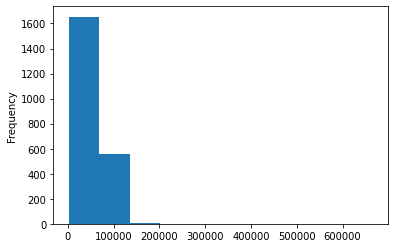

In [8]:
data['Income'].plot.hist();
sns.set(rc={'figure.figsize':(5,5)}) 
plt.show()                            # con esto vemos la distribución de la caracteristica, se observa que es del tipo distribución positiva, se debe imputar por la mediana 

In [9]:
median = data['Income'].median()  # se obtiene el valor de la mediana de la caracteristica Income 

In [10]:
data['Income'].fillna(median, inplace = True)  # se procede a imputar por la mediana los valores nulos de la caracteristica Income

In [11]:
data['Income'].isnull().sum()  # se verifica que no queden nulos en la caracteristica

0

In [12]:
# Validando los tipos de datos en el dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [13]:
data.size # tenemos un tamaño de los datos de  64960

64960

## EDA - Analisis Exploratorio de Datos 

Exploracion de las caracteristicas, realizar boxplot, histrogramas, Medidas de Tendencia Central

In [14]:
data1 = data.copy()  # se realiza una copia del data set para el proceso del EDA y para transformaciones futuras

1.Analisis Exploratorio de la Caracteristica  ID

Esta caracteristica corresponde a un ID unico que se le asigna al cliente, no se le cálcula medidas de tendencia central, es un codigo identificador del cliente

In [15]:
data1['ID'].duplicated().sum()    # se procede a verificar si existe algùn codigo duplicado, tal parece no hay datos duplicados en codigo del cliente

0

2.Analisis Exploratorio de la Caracteristica **Year_Birth**

Corresponde al año de nacimiento de los clientes

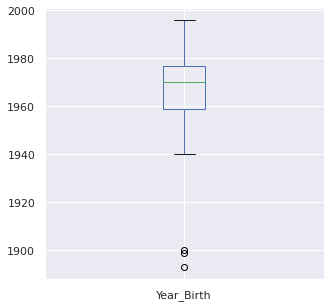

In [16]:
data1['Year_Birth'].plot(kind='box') 
sns.set(rc={'figure.figsize':(5,5)}) 
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

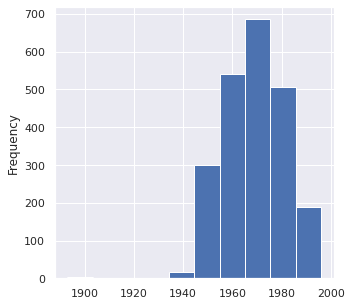

In [17]:
data1['Year_Birth'].plot(kind='hist') 
sns.set(rc={'figure.figsize':(5,5)}) 
plt.show() 

In [18]:
data1['Year_Birth'].quantile(0.25)    # primer quartil indica que un 25% de las personas presentan  una fecha de nacimiento menor o igual a 1959

1959.0

In [19]:
data1['Year_Birth'].quantile(0.5)    # segundo quartil indica que un 50% de las personas presentan  una fecha de nacimiento  menor o igual a 1970

1970.0

In [20]:
data1['Year_Birth'].quantile(0.75)    # tercer quartil indica que un 75% de las personas presentan  una fecha de nacimiento  menor o igual a 1977

1977.0

In [21]:
data1['Year_Birth'].min()  # la fecha más antigua es 1893

1893

In [22]:
data1['Year_Birth'].max()  # la fecha mas reciente de nacimiento es 1996

1996

In [23]:
data1['Year_Birth'].mode()    # la fecha de nacimiento que más se repite es 1976

0    1976
dtype: int64

In [24]:
data1['Year_Birth'].median()  # La mediana indica que un 250% de las personas presentan  una fecha de nacimiento menor o igual a 1970

1970.0

In [25]:
data1['Year_Birth'].mean()  # el año promedio de nacimiento de loa clientes es 1968

1968.8058035714287

In [26]:
data1['Year_Birth'].std()  # los valores se alejan del promedio en 11.98

11.984069456885825

3.Analisis Exploratorio de la Caracteristica **Education**

Presenta el nivel educativo de los clientes

Al ser una caracteristica del tipo objeto no se le puede obtener el boxplot, mas adelante se procederá convertir en numérica.

In [27]:
data1['Education'].mode()   # el nivel educativo que más está presente en los clientes es Graduation

0    Graduation
dtype: object

In [28]:
data1['Education'].describe()   # tenemos en la caracteristica un total de 2240 bservaciones, cinco categorias distintas
                                 # 2n Cycle , Basic, Graduation, Master, PhD

count           2240
unique             5
top       Graduation
freq            1127
Name: Education, dtype: object

In [29]:
data1.groupby('Education').size()   # los niveles educativos de los clientes predomida Graduation, seguido por PhD y en tercer lugar Master.

Education
2n Cycle       203
Basic           54
Graduation    1127
Master         370
PhD            486
dtype: int64

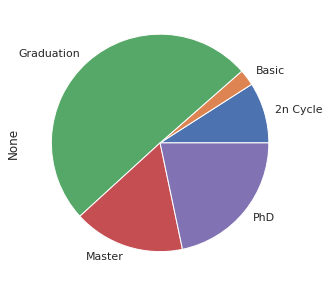

In [30]:
data1.groupby('Education').size().plot(kind = 'pie')       # se observa el peso de cada una de las niveles educativos de los clientes

4.Analisis Exploratorio de la Caracteristica **Marital_Status**

Indica el estado civil de los clientes, ejemplo casado, soltero o casado

In [31]:
data1.groupby('Marital_Status').size()   # se observa la distribucuón del tipo de estatus marital de los lientes

Marital_Status
Absurd        2
Alone         3
Divorced    232
Married     864
Single      480
Together    580
Widow        77
YOLO          2
dtype: int64

In [32]:
data1['Marital_Status'].mode()   # el estado civil mas frecuente corresponde a Married = casados

0    Married
dtype: object

In [33]:
data1['Marital_Status'].describe()       

count        2240
unique          8
top       Married
freq          864
Name: Marital_Status, dtype: object

5.Analisis Exploratorio de la Caracteristica **Income**

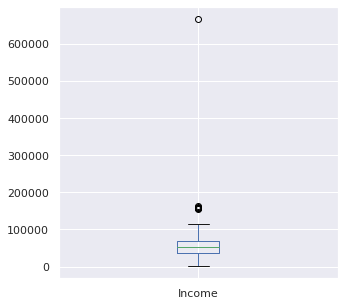

In [34]:
data1['Income'].plot(kind='box')              # Income coresponde a los ingresos de los clientes
sns.set(rc={'figure.figsize':(5,5)}) 
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

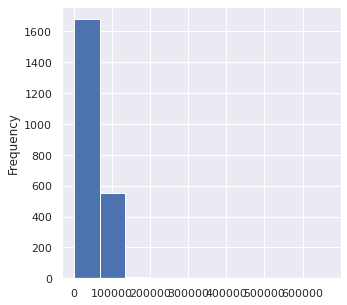

In [35]:
data1['Income'].plot(kind='hist')     # distribucion del tipo positiva, acumulacion de datos al lado izquierdo
sns.set(rc={'figure.figsize':(5,5)}) 
plt.show() 

In [36]:
data1['Income'].quantile(0.25)    # indica que un 25% de las personas presentan  un valor menor o igual de ingresos a 35 538

35538.75

In [37]:
data1['Income'].quantile(0.5)  # indica que un 50% de las personas presentan  un valor menor o igual de ingresos a 51 381

51381.5

In [38]:
data1['Income'].quantile(0.75)    # indica que un 75% de las personas presentan  un valor menor o igual de 68 289

68289.75

In [39]:
data1['Income'].min()   # el ingresom minimo es de 1730

1730.0

In [40]:
data1['Income'].max()  # el ingreso maximo es de 666 666

666666.0

In [41]:
data1['Income'].mode()  # el ingreso que mas se repite es de 51 381

0    51381.5
dtype: float64

In [42]:
data1['Income'].median()   # la mediana indica que un 50% de las personas presentan  un valor menor o igual de 51 381.5

51381.5

In [43]:
data1['Income'].mean()  # el ingreso promedio es de 52 237

52237.97544642857

In [44]:
data1['Income'].std()   # los valores del ingreso se desvian del promedio en 25 037

25037.955890621957

6.Analisis Exploratorio de la Caracteristica **Kidhome**

Indica la cantidad de niños por hogar de los clientes

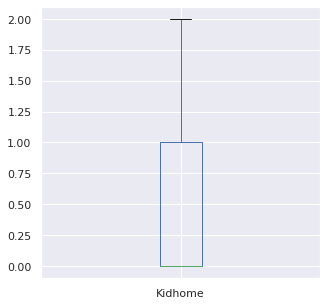

In [45]:
data1['Kidhome'].plot(kind='box')            # el vlaor minimo de niños por hogar corresponde a cero, el vlaor maximo corresponde a 2
sns.set(rc={'figure.figsize':(5,5)}) 
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

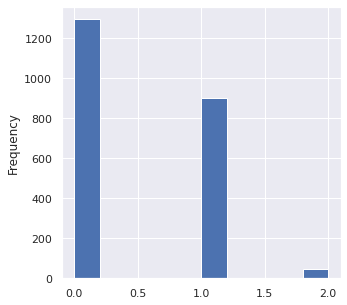

In [46]:
data1['Kidhome'].plot(kind='hist')                 # distribucion con caracteristicas del tipo positiva, valores acumulados a la izquierda
sns.set(rc={'figure.figsize':(5,5)}) 
plt.show() 

In [47]:
data1['Kidhome'].quantile(0.25)     # indica que un 25% de las personas presentan  cero hijos

0.0

In [48]:
data1['Kidhome'].quantile(0.5)    # indica que un 50% de las personas presentan cero hijos

0.0

In [49]:
data1['Kidhome'].quantile(0.75)  # indica que un 75% de las personas presentan  uno o menos hijos 

1.0

In [50]:
data1['Kidhome'].min()   # el valor mas bajo de hijos por hogar es cero

0

In [51]:
data1['Kidhome'].max()    # el valor mas alto de niños por hogar es de 2 

2

In [52]:
data1['Kidhome'].mode()    # el valor que mas se repite es cero

0    0
dtype: int64

In [53]:
data1['Kidhome'].median()   # la mediana indica que un % de las personas presentan  cero hijos

0.0

In [54]:
data1['Kidhome'].mean()    # en promedio las familias presentan menos de un hijo por hogar

0.44419642857142855

In [55]:
data1['Kidhome'].std()  # los valores se alejan del promedio en 0.53

0.5383980977345874

7.Analisis Exploratorio de la Caracteristica **Teenhome**

Cantidad de adolescentes por hogar de los clientes

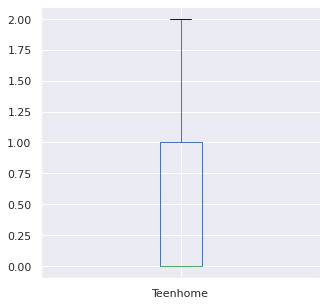

In [56]:
data1['Teenhome'].plot(kind='box')     # el minimo de hijos adolescentes por hogar es de cero, el maxino es de cero
sns.set(rc={'figure.figsize':(5,5)}) 
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

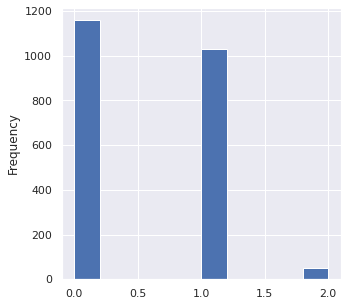

In [57]:
data1['Teenhome'].plot(kind='hist') 
sns.set(rc={'figure.figsize':(5,5)}) 
plt.show() 

In [58]:
data1['Teenhome'].quantile(0.25)    # indica que un 25% de las personas presentan un valor de cero adolescentes por hogar

0.0

In [59]:
data1['Teenhome'].quantile(0.5)   # indica que un 50% de las personas presentan  un valor de cero adolescentes por hogar

0.0

In [60]:
data1['Teenhome'].quantile(0.75)   # indica que un 75 % de las personas presentan  un valor menor o igual de a un hijo adolescente por hogar 

1.0

In [61]:
data1['Teenhome'].min()   # el valor minimo es de cero 

0

In [62]:
data1['Teenhome'].max()   # el valor maximo es de 2  

2

In [63]:
data1['Teenhome'].mode()  # el valor mas repetido es de cero hijos

0    0
dtype: int64

In [64]:
data1['Teenhome'].median()  # indica que un 50% de las personas presentan  un valor de cero adolescentes por hogar

0.0

In [65]:
data1['Teenhome'].mean()  # el valor promedio de hijos es menor a uno por hogar

0.50625

In [66]:
data1['Teenhome'].std()   # los valores se desvian del promedio en 0.54

0.5445382307698755

8.Analisis Exploratorio de la Caracteristica **Dt_Customer**


Fecha de inscripción del cliente en la empresa.

In [67]:
data1.groupby('Dt_Customer').size() 

Dt_Customer
01-01-2013     4
01-01-2014     3
01-02-2013     3
01-02-2014     1
01-03-2013     3
              ..
31-08-2012    12
31-08-2013     8
31-10-2012     5
31-12-2012     1
31-12-2013     3
Length: 663, dtype: int64

In [68]:
data1['Dt_Customer'] = pd.to_datetime(data1.Dt_Customer)

In [69]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

Medidas de tendencia central y otros valores de relevancia en el análisis

In [70]:
data1['Dt_Customer'].quantile(0.25)     # indica que un 25% de las personas presentan una fecha  menor o igual de inscripcion con la empres al 2016-01-09

Timestamp('2013-01-19 18:00:00')

In [71]:
data1['Dt_Customer'].quantile(0.50)      # indica que un 50 % de las personas presentan un valor menor o igual de la fecha de inscripcion al 2013-07-11

Timestamp('2013-07-11 00:00:00')

In [72]:
data1['Dt_Customer'].quantile(0.75)      # indica que un 75% de las personas presentan un valor menor o igual de la fecha de inscripcion al 2013-12-30

Timestamp('2013-12-30 06:00:00')

In [73]:
data1['Dt_Customer'].min()    # la fehca minim a 2012-01-08

Timestamp('2012-01-08 00:00:00')

In [74]:
data1['Dt_Customer'].max()   # la fecha maxima 2014.12-06

Timestamp('2014-12-06 00:00:00')

In [75]:
data1['Dt_Customer'].mode()   # la fehca que mas se repite es 2012-08-31

0   2012-08-31
dtype: datetime64[ns]

In [76]:
data1['Dt_Customer'].mean()  

Timestamp('2013-07-11 22:57:38.571432192')

9.Analisis Exploratorio de la Caracteristica **Recency**

Número de días desde la última compra del cliente.


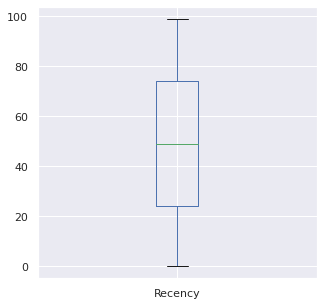

In [77]:
data1['Recency'].plot(kind='box')                  # La menor cantidad de dias que una persona presenta desde su ultima compra es de cero, y el maximo de dias 99 .
sns.set(rc={'figure.figsize':(5,5)}) 
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

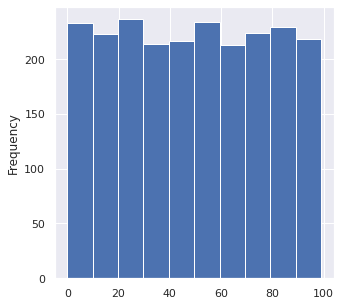

In [78]:
data1['Recency'].plot(kind='hist') 
sns.set(rc={'figure.figsize':(5,5)}) 
plt.show() 

In [79]:
data1['Recency'].quantile(0.25)     # indica que un 25% de las personas presentan un valor valor menor o igual de 24 dias desde la ultima compra

24.0

In [80]:
data1['Recency'].quantile(0.5)    # indica que un 50% de las personas presentan un valor menor o igual de 49 dias desde la ultima compra

49.0

In [81]:
data1['Recency'].quantile(0.75)   # indica que un 75% de las personas presentan  un valor  menor o igual de 74 dias desde la ultima compra

74.0

In [82]:
data1['Recency'].min()   # el valor minimo es cero

0

In [83]:
data1['Recency'].max()   # el valor maximo es de 99 dias 

99

In [84]:
data1['Recency'].mode()  # el valor que mas se repite es 56 dias

0    56
dtype: int64

In [85]:
data1['Recency'].median()   # indica que un 50% de las personas presentan un valor menor o igual de 49 dias desde la ultima compra

49.0

In [86]:
data1['Recency'].mean()   # el valor promedio de dias desde la ultima compra

49.109375

In [87]:
data1['Recency'].std()    # los valores se alejan del promedio en 28.96

28.962452808378206

10.Analisis Exploratorio de la Caracteristica **MntWines**

Cantidad gastada en vino en los últimos 2 años

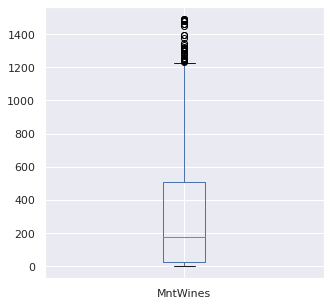

In [88]:
data1['MntWines'].plot(kind='box')               # se observan valores atipicos , el valor minimo de cero , el valor maximo de 1493, la mediana de 173
sns.set(rc={'figure.figsize':(5,5)}) 
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

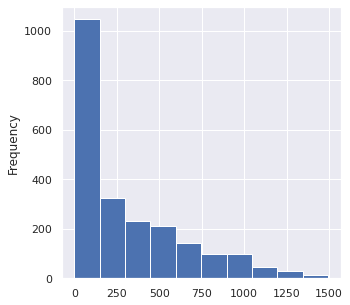

In [89]:
data1['MntWines'].plot(kind='hist')       # distribucion con comportamieno tipo positiva 
sns.set(rc={'figure.figsize':(5,5)}) 
plt.show() 

In [90]:
data1['MntWines'].quantile(0.25)   # indica que un 25% de las personas presentan un valor menor o igual de compra de bebidas de 23.75 en los ultimos 2 años

23.75

In [91]:
data1['MntWines'].quantile(0.5)   # indica que un 50% de las personas presentan un valor menor o igual  a 173.5 de comrpas en bebidas

173.5

In [92]:
data1['MntWines'].quantile(0.75)   # indica que un 75% de las personas presentan un valor menor o igual a 504.25 en bebidas en los ultimos dos años

504.25

In [93]:
data1['MntWines'].min()   # e valor minimo es de cero

0

In [94]:
data1['MntWines'].max()  # el valor maximo es de 1493

1493

In [95]:
data1['MntWines'].mode()  # el valor que mas se repite es 2

0    2
dtype: int64

In [96]:
data1['MntWines'].median()   # indica que un 50% de las personas presentan un valor menor o igual a 173

173.5

In [97]:
data1['MntWines'].mean()  # el valor promedio de compras en productos de bebidas es de 303.93

303.9357142857143

In [98]:
data1['MntWines'].std()   # los valores se desvian del promedio en 336.59

336.5973926053715

11.Analisis Exploratorio de la Caracteristica **MntFruits**

Cantidad gastada en frutas en los últimos 2 años.


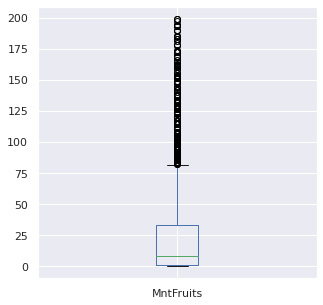

In [99]:
data1['MntFruits'].plot(kind='box')      # se observan valores atipicos, valor inimo cero , valor maximo de 199, mediana de 8
sns.set(rc={'figure.figsize':(5,5)}) 
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

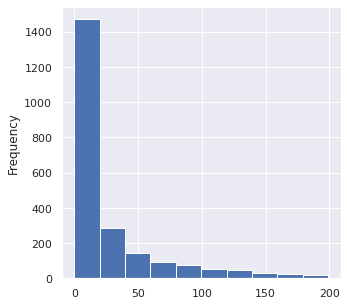

In [100]:
data1['MntFruits'].plot(kind='hist')   # distribucion con comportamiento positivo, acumulacion de la datos a la izquierda.
sns.set(rc={'figure.figsize':(5,5)}) 
plt.show() 

In [101]:
data1['MntFruits'].quantile(0.25)   # indica que un 25% de las personas presentan un valor menor o igual 1 en el consumo de frutas

1.0

In [102]:
data1['MntFruits'].quantile(0.5)   # indica que un 50% de las personas presentan un valor menor o igual  8  en el consumo de frutas

8.0

In [103]:
data1['MntFruits'].quantile(0.75)   # indica que un % de las personas presentan un valor menor o igual  33 en el consumo de frutas

33.0

In [104]:
data1['MntFruits'].min()   # el  valor minimo es de cero

0

In [105]:
data1['MntFruits'].max()  # el valor maximo es de 199 lo que una persona a gastado en los ultimos dis años en frutas

199

In [106]:
data1['MntFruits'].mode()   # el valor mas repetido de lo que las personas gastan en frutas es de cero

0    0
dtype: int64

In [107]:
data1['MntFruits'].median()   # indica que un 50% de las personas presentan un valor menor o igual 8 en lo que gastan las personas en frutas

8.0

In [108]:
data1['MntFruits'].mean()  # el valor promedio de lo que las personas gastan en frutas en los dos ultimos 2 años en frutas es de 26.30

26.302232142857143

In [109]:
data1['MntFruits'].std()   # los valores se pueden desviar del promedio en 39.77

39.77343376457866

12.Analisis Exploratorio de la Caracteristica **MntMeatProducts**

Cantidad gastada en carne en los últimos 2 años.

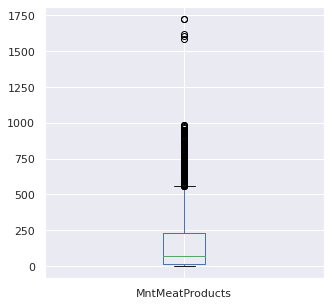

In [110]:
data1['MntMeatProducts'].plot(kind='box')      # se observan valores atipicos
sns.set(rc={'figure.figsize':(5,5)}) 
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

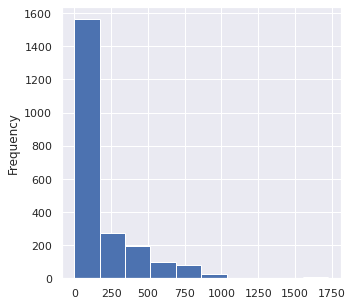

In [111]:
data1['MntMeatProducts'].plot(kind='hist')    # distribucion con comportamiento tipo positivo
sns.set(rc={'figure.figsize':(5,5)}) 
plt.show() 

In [112]:
data1['MntMeatProducts'].quantile(0.25)    # indica que un 25% de las personas presentan un valor menor o igual 16 en lo que han gastado  en productos carnicos los ultimos 2 años

16.0

In [113]:
data1['MntMeatProducts'].quantile(0.5)   # indica que un 50% de las personas presentan un valor menor o igual a 67 en lo que las personas han gastado en los ultimos 2 años en productos carnicos 

67.0

In [114]:
data1['MntMeatProducts'].quantile(0.75)   # indica que un 75% de las personas presentan un valor menor o igual 232 en lo que las personas han gastado en los ultimos dos años en productos carnicos

232.0

In [115]:
data1['MntMeatProducts'].min()  # el valor mas bajo es de cero

0

In [116]:
data1['MntMeatProducts'].max()   # el valor mas alto  es de 1725

1725

In [117]:
data1['MntMeatProducts'].median()   # indica que un 50% de las personas presentan un valor menor o igual  a 67 

67.0

In [118]:
data1['MntMeatProducts'].mean()  # el monto promedio que las personas han gastado en productos carnicos los ultimos 2 años es de 166.95

166.95

In [119]:
data1['MntMeatProducts'].std()   # los valores se desvian del promedio en 225.71

225.71537251175434

13.Analisis Exploratorio de la Caracteristica **MntFishProducts**

Cantidad gastada en pescado en los últimos 2 años.

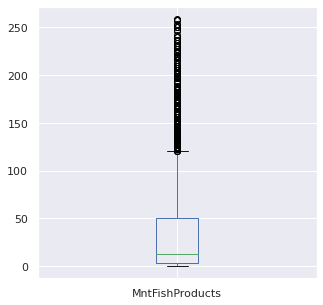

In [120]:
data1['MntFishProducts'].plot(kind='box') 
sns.set(rc={'figure.figsize':(5,5)}) 
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

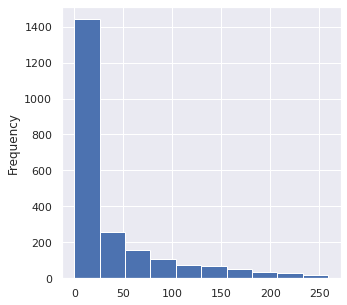

In [121]:
data1['MntFishProducts'].plot(kind='hist')               # comportamineto de los datos con distribucion del tipo positiva 
sns.set(rc={'figure.figsize':(5,5)}) 
plt.show() 

In [122]:
data1['MntFishProducts'].quantile(0.25)    # indica que un 25% de las personas presentan un valor menor o igual a 3 en el lo que gastan en pescado 

3.0

In [123]:
data1['MntFishProducts'].quantile(0.5)   # indica que un 50% de las personas presentan un valor menor o igual a 12 en lo que gastan en pescado

12.0

In [124]:
data1['MntFishProducts'].quantile(0.75)   # indica que un 75% de las personas presentan un valor menor o igual a 50 en lo que gastan en pescado

50.0

In [125]:
data1['MntFishProducts'].min()    # el valor mas bajo es de cero

0

In [126]:
data1['MntFishProducts'].max()    # el valor mas alto de 259 

259

In [127]:
data1['MntFishProducts'].mode()   # el valor que mas se repite es d ecero

0    0
dtype: int64

In [128]:
data1['MntFishProducts'].median()   # indica que un  50 % de las personas presentan un valor menor o igual a 12 en lo que las personas gastan en pescado 

12.0

In [129]:
data1['MntFishProducts'].mean()   # En promedio lo que las personas han gastado los ultimos dos años en pescado es de 37.52

37.52544642857143

In [130]:
data1['MntFishProducts'].std()   # los valores se alejan del promedio en 54.62

54.62897940287769

14.Analisis Exploratorio de la Caracteristica **MntSweetProducts**

Cantidad gastada en dulces en los últimos 2 años.

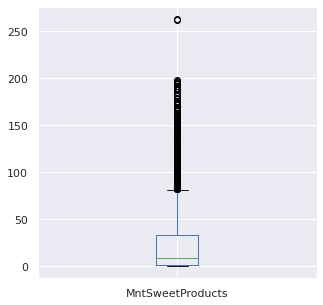

In [131]:
data1['MntSweetProducts'].plot(kind='box')     # se observan valores atipicos 
sns.set(rc={'figure.figsize':(5,5)}) 
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

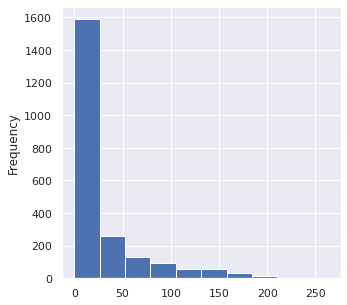

In [132]:
data1['MntSweetProducts'].plot(kind='hist')    # distribucion del tipo positiva 
sns.set(rc={'figure.figsize':(5,5)}) 
plt.show() 

In [133]:
data1['MntSweetProducts'].quantile(0.25)    # indica que un 25% de las personas presentan un valor menor o igual a 1 lo que las personas han gastado en dulces los ultimos 2 años

1.0

In [134]:
data1['MntSweetProducts'].quantile(0.5)   # indica que un 50% de las personas presentan un valor menor o igual a 8  lo que las personas han gastado en dulces los ultimos 2 años

8.0

In [135]:
data1['MntSweetProducts'].quantile(0.75)   # indica que un 75% de las personas presentan un valor menor o igual a 33  lo que las personas han gastado en dulces los ultimos 2 años

33.0

In [136]:
data1['MntSweetProducts'].min()   # el valor minimo es de 0

0

In [137]:
data1['MntSweetProducts'].max()  # el valor maximo es de 263

263

In [138]:
data1['MntSweetProducts'].mode()   # iel valor que mas se repite es de 0

0    0
dtype: int64

In [139]:
data1['MntSweetProducts'].median()   # indica que un 50% de las personas presentan un valor menor o igual a 8

8.0

In [140]:
data1['MntSweetProducts'].mean()   # el promedio de gasto en dulces es de 27.062

27.06294642857143

In [141]:
data1['MntSweetProducts'].std()  # los valores se desvian en 41.28 del promedio 

41.28049848785481

15.Analisis Exploratorio de la Caracteristica **MntGoldProds**

Cantidad gastada en oro en los últimos 2 años.

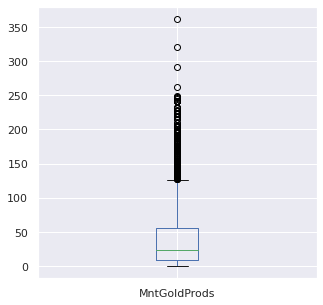

In [142]:
data1['MntGoldProds'].plot(kind='box')     # se observan valores atipicos en la caracteristica
sns.set(rc={'figure.figsize':(5,5)}) 
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

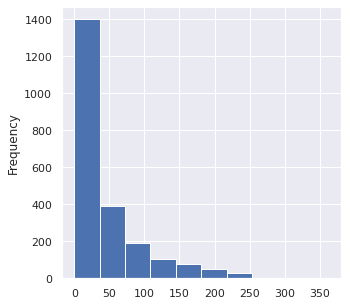

In [143]:
data1['MntGoldProds'].plot(kind='hist')    # distibucion de tipo positiva 
sns.set(rc={'figure.figsize':(5,5)}) 
plt.show() 

In [144]:
data1['MntGoldProds'].quantile(0.25)    # indica que un 25% de las personas presentan un valor menor o igual a 9

9.0

In [145]:
data1['MntGoldProds'].quantile(0.5)  # indica que un 50% de las personas presentan un valor menor o igual a 24

24.0

In [146]:
data1['MntGoldProds'].quantile(0.75)  # indica que un 75% de las personas presentan un valor menor o igual a 56 lo que han gastado en oro los ultimos 2 años

56.0

In [147]:
data1['MntGoldProds'].min()  # valor minimo es de cero

0

In [148]:
data1['MntGoldProds'].max()  # el valor mas alto es de 362

362

In [149]:
data1['MntGoldProds'].mode()  # el valor mas repetido es de 1

0    1
dtype: int64

In [150]:
data1['MntGoldProds'].median()  # indica que un 50% de las personas presentan un valor menor o igual a 24

24.0

In [151]:
data1['MntGoldProds'].mean()   # el promedio de lo que las personas gastan en productos de otro es 44.02

44.021875

In [152]:
data1['MntGoldProds'].std()  # los valores se desvian en 52.16 del promedio

52.1674389149972

16.Analisis Exploratorio de la Caracteristica **NumDealsPurchases**

Número de compras realizadas con descuento.

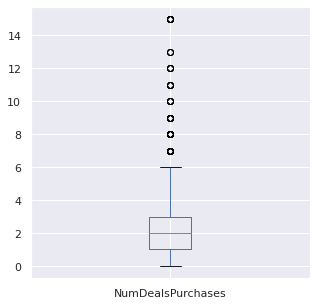

In [153]:
data1['NumDealsPurchases'].plot(kind='box') 
sns.set(rc={'figure.figsize':(5,5)}) 
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

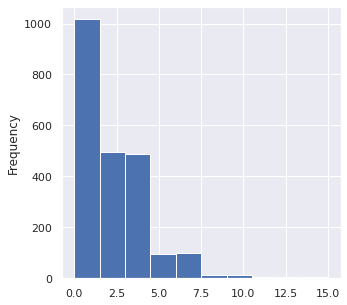

In [154]:
data1['NumDealsPurchases'].plot(kind='hist')    # distribucion del tipo positiva 
sns.set(rc={'figure.figsize':(5,5)}) 
plt.show() 

In [155]:
data1['NumDealsPurchases'].quantile(0.25)   # indica que un 25% de las personas presentan un valor menor o igual una compra

1.0

In [156]:
data1['NumDealsPurchases'].quantile(0.5)  # indica que un 50% de las personas presentan un valor menor o igual de 2 compras

2.0

In [157]:
data1['NumDealsPurchases'].quantile(0.75)  # indica que un 75% de las personas presentan un valor menor o igual de 3 compras 

3.0

In [158]:
data1['NumDealsPurchases'].min()   # el valor que mas se repite es 0 

0

In [159]:
data1['NumDealsPurchases'].max()  # el valor maximo es de 15 

15

In [160]:
data1['NumDealsPurchases'].mode()  # el valro que mas se repite es 1 

0    1
dtype: int64

In [161]:
data1['NumDealsPurchases'].median()  # indica que un 50% de las personas presentan un valor menor o igual a 2 la cantidad de conmpras realizadas con descuento

2.0

In [162]:
data1['NumDealsPurchases'].mean()   # el promedio de las compras realizadas con descuento es de 2.32

2.325

In [163]:
data1['NumDealsPurchases'].std()  # los valores se desvian en 1.93

1.9322375008559614

17.Analisis Exploratorio de la Caracteristica **NumWebPurchases**

Número de compras realizadas a través del sitio web de la empresa.

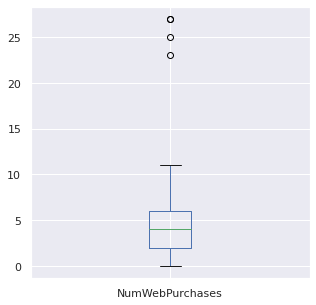

In [164]:
data1['NumWebPurchases'].plot(kind='box') 
sns.set(rc={'figure.figsize':(5,5)}) 
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

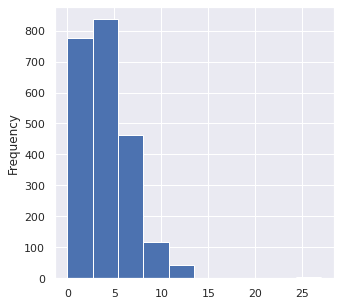

In [165]:
data1['NumWebPurchases'].plot(kind='hist')   # distribucion del tipo positiva 
sns.set(rc={'figure.figsize':(5,5)}) 
plt.show() 

In [166]:
data1['NumWebPurchases'].quantile(0.25)   # indica que un 25% de las personas presentan un valor menor o igual a 2 las compras por la web

2.0

In [167]:
data1['NumWebPurchases'].quantile(0.5)  # indica que un 50% de las personas presentan un valor menor o igual a 4 las compras por la web

4.0

In [168]:
data1['NumWebPurchases'].quantile(0.75)   # indica que un 75% de las personas presentan un valor menor o igual a 6 las compras por la web

6.0

In [169]:
data1['NumWebPurchases'].min()  # el valor minimo es de cero

0

In [170]:
data1['NumWebPurchases'].max()   # el valor maximo de compras por la web es de 27

27

In [171]:
data1['NumWebPurchases'].mode()   # el valor que mas se repite es 2

0    2
dtype: int64

In [172]:
data1['NumWebPurchases'].median()   # indica que un 50% de las personas presentan un valor menor o igual a 4

4.0

In [173]:
data1['NumWebPurchases'].mean()  # el valor promedio de compras realizadas por la web es de 4

4.084821428571429

In [174]:
data1['NumWebPurchases'].std()   # los valores se alejan del promedio en 2.77

2.7787141473881087

18.Analisis Exploratorio de la Caracteristica **NumCatalogPurchases**

Número de compras realizadas mediante catálogo.

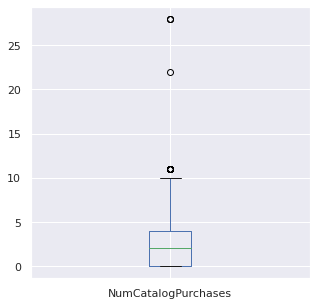

In [175]:
data1['NumCatalogPurchases'].plot(kind='box') 
sns.set(rc={'figure.figsize':(5,5)}) 
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

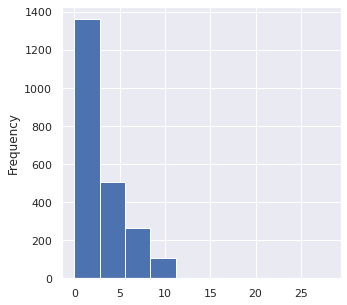

In [176]:
data1['NumCatalogPurchases'].plot(kind='hist')    #la distribucion es de tipo positiva, concentracion de los datos hacia la izquierda del grafico
sns.set(rc={'figure.figsize':(5,5)}) 
plt.show() 

In [177]:
data1['NumCatalogPurchases'].quantile(0.25)   # indica que un 25% de las personas presentan un valor menor o igual a 0 compras por catalogo

0.0

In [178]:
data1['NumCatalogPurchases'].quantile(0.5)   # indica que un 50% de las personas presentan un valor menor o igual a 2 de compras por catalogo

2.0

In [179]:
data1['NumCatalogPurchases'].quantile(0.75)   # indica que un 75% de las personas presentan un valor menor o igual a 4 de compras por catalogo

4.0

In [180]:
data1['NumCatalogPurchases'].min()   # el valor minimo es cero

0

In [181]:
data1['NumCatalogPurchases'].max()   # el valor maximo es de 28

28

In [182]:
data1['NumCatalogPurchases'].mode()   # el valor que mas se repite es cero

0    0
dtype: int64

In [183]:
data1['NumCatalogPurchases'].median()   #  indica que un 50% de las personas presentan un valor menor o igual a 2

2.0

In [184]:
data1['NumCatalogPurchases'].mean()  # el valor promedio de copras por catalogo corresponde a 2.66

2.6620535714285714

In [185]:
data1['NumCatalogPurchases'].std()   # los valores se alejan del promeido en 2.92

2.9231006555397197

19.Analisis Exploratorio de la Caracteristica **NumStorePurchases**

Número de compras realizadas directamente en tiendas.

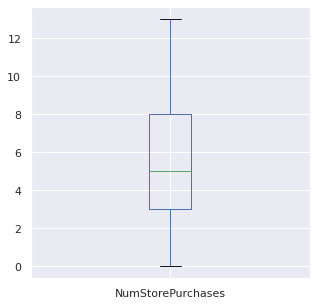

In [186]:
data1['NumStorePurchases'].plot(kind='box')      # no se observan valores atipicos , el vlaor minimo es cero, valor maximo 13. la mediana corresponde a 5
sns.set(rc={'figure.figsize':(5,5)})  
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

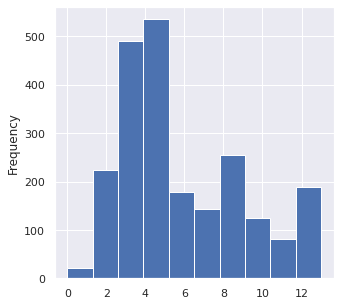

In [187]:
data1['NumStorePurchases'].plot(kind='hist') 
sns.set(rc={'figure.figsize':(5,5)}) 
plt.show() 

In [188]:
data1['NumStorePurchases'].quantile(0.25)   # indica que un 25% de las personas presentan un valor menor o igual a 3

3.0

In [189]:
data1['NumStorePurchases'].quantile(0.5)  # indica que un 50% de las personas presentan un valor menor o igual a 5

5.0

In [190]:
data1['NumStorePurchases'].quantile(0.75)   # indica que un 75% de las personas presentan un valor menor o igual a 8

8.0

In [191]:
data1['NumStorePurchases'].min()  # el valor minimo es cero

0

In [192]:
data1['NumStorePurchases'].max()  # el valor maximo es 13

13

In [193]:
data1['NumStorePurchases'].mode()  # el valor que mas se repite es 3

0    3
dtype: int64

In [194]:
data1['NumStorePurchases'].median()   # indica que un 50% de las personas presentan un valor menor o igual a 5

5.0

In [195]:
data1['NumStorePurchases'].mean()  # el valor promedio de compras realizadas en las tiendas es de 5.79

5.790178571428571

In [196]:
data1['NumStorePurchases'].std()   # los valores se alejan del promedio en 3.25

3.250958145674417

20.Analisis Exploratorio de la Caracteristica **NumWebVisitsMonth**

Número de visitas al sitio web de la empresa en el último mes.

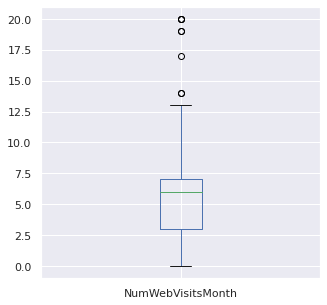

In [197]:
data1['NumWebVisitsMonth'].plot(kind='box') 
sns.set(rc={'figure.figsize':(5,5)}) 
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

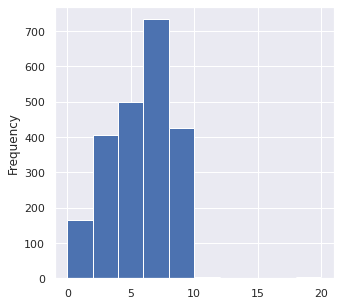

In [198]:
data1['NumWebVisitsMonth'].plot(kind='hist') 
sns.set(rc={'figure.figsize':(5,5)}) 
plt.show() 

In [199]:
data1['NumWebVisitsMonth'].quantile(0.25)    # indica que un 25% de las personas presentan un valor menor o igual a  3

3.0

In [200]:
data1['NumWebVisitsMonth'].quantile(0.5)   # indica que un 50% de las personas presentan un valor menor o igual a 6

6.0

In [201]:
data1['NumWebVisitsMonth'].quantile(0.75)   # indica que un 75% de las personas presentan un valor menor o igual a  7

7.0

In [202]:
data1['NumWebVisitsMonth'].min()    # valor minimo es cero

0

In [203]:
data1['NumWebVisitsMonth'].max()   # el valor maximo es 20

20

In [204]:
data1['NumWebVisitsMonth'].mode()  # el valor que mas se repite es 7

0    7
dtype: int64

In [205]:
data1['NumWebVisitsMonth'].median()   # indica que un 50% de las personas presentan un valor menor o igual de 6 visitas a la pagina web

6.0

In [206]:
data1['NumWebVisitsMonth'].mean()   # el valor promedio de visitas a la pagina web es de 5.31

5.316517857142857

In [207]:
data1['NumWebVisitsMonth'].std()   # los valores se alejan del promedio en 2.42

2.426645009547285

21.Analisis Exploratorio de la Caracteristica **AcceptedCmp3**

1 si el cliente aceptó la oferta en la 3ª campaña, 0 en caso contrario.

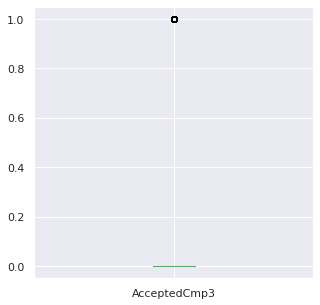

In [208]:
data1['AcceptedCmp3'].plot(kind='box')   # caracteristica del tipo binaria, no se aprovecha tanto para la generacion de graficas, 
sns.set(rc={'figure.figsize':(5,5)})     #se procede más adelante a utilizar en caso de ser util
plt.show()

In [209]:
data1['AcceptedCmp3'].quantile(0.25)

0.0

In [210]:
data1['AcceptedCmp3'].quantile(0.5)

0.0

In [211]:
data1['AcceptedCmp3'].quantile(0.75)

0.0

In [212]:
data1['AcceptedCmp3'].mode()

0    0
dtype: int64

22.Analisis Exploratorio de la Caracteristica **AcceptedCmp4**

1 si el cliente aceptó la oferta en la cuarta campaña, 0 en caso contrario.

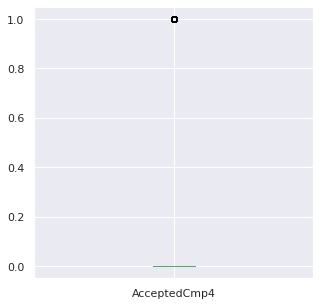

In [213]:
data1['AcceptedCmp4'].plot(kind='box')   # caracteristica del tipo binaria, no se aprovecha tanto para la generacion de graficas, 
sns.set(rc={'figure.figsize':(5,5)})     #se procede más adelante a utilizar en caso de ser util
plt.show()

In [214]:
data1['AcceptedCmp4'].mode()

0    0
dtype: int64

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

23.Analisis Exploratorio de la Caracteristica **AcceptedCmp5**

1 si el cliente aceptó la oferta en la quinta campaña, 0 en caso contrario.

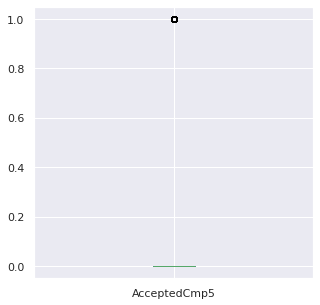

In [215]:
data1['AcceptedCmp5'].plot(kind='box')   # caracteristica del tipo binaria, no se aprovecha tanto para la generacion de graficas, 
sns.set(rc={'figure.figsize':(5,5)})     #se procede más adelante a utilizar en caso de ser util
plt.show()

In [216]:
data1['AcceptedCmp5'].mode()

0    0
dtype: int64

24.Analisis Exploratorio de la Caracteristica **AcceptedCmp1**

1 si el cliente aceptó la oferta en la 1ª campaña, 0 en caso contrario.



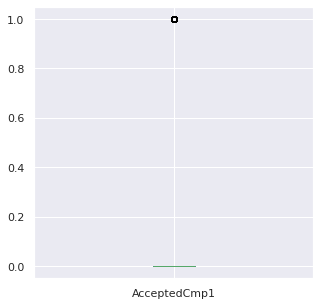

In [217]:
data1['AcceptedCmp1'].plot(kind='box')   # caracteristica del tipo binaria, no se aprovecha tanto para la generacion de graficas, 
sns.set(rc={'figure.figsize':(5,5)})     #se procede más adelante a utilizar en caso de ser util
plt.show()

In [218]:
data1['AcceptedCmp1'].mode()

0    0
dtype: int64

25.Analisis Exploratorio de la Caracteristica **AcceptedCmp2**

1 si el cliente aceptó la oferta en la segunda campaña, 0 en caso contrario.

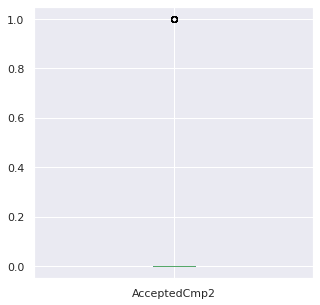

In [219]:
data1['AcceptedCmp2'].plot(kind='box')   # caracteristica del tipo binaria, no se aprovecha tanto para la generacion de graficas, 
sns.set(rc={'figure.figsize':(5,5)})     #se procede más adelante a utilizar en caso de ser util
plt.show()

In [220]:
data1['AcceptedCmp2'].mode()

0    0
dtype: int64

26.Analisis Exploratorio de la Caracteristica **Complain**

 1si el cliente se quejó en los últimos 2 años, 0 en caso contrario.

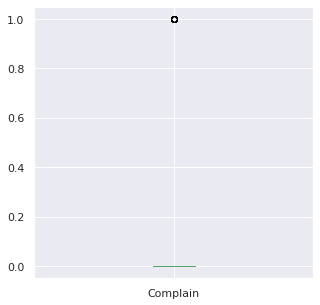

In [221]:
data1['Complain'].plot(kind='box')    # caracteristica del tipo binaria, no se aprovecha tanto para la generacion de graficas, 
sns.set(rc={'figure.figsize':(5,5)})  #se procede más adelante a utilizar en caso de ser util
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

In [222]:
data1['Complain'].mode()

0    0
dtype: int64

In [223]:
data1.groupby('Complain').size() 

Complain
0    2219
1      21
dtype: int64

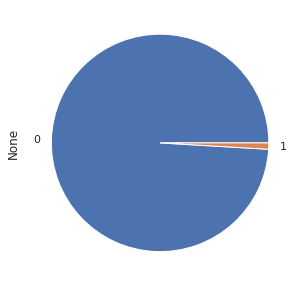

In [224]:
data1.groupby('Complain').size().plot(kind = 'pie')     # se observa que la mayoria de los clientes no se quejan 

27.Analisis Exploratorio de la Caracteristica **Z_CostContact**

Un unico valor en toda la caracteristica 

In [225]:
data1['Z_CostContact'].head(5)

0    3
1    3
2    3
3    3
4    3
Name: Z_CostContact, dtype: int64

In [226]:
data1.groupby('Z_CostContact').size() 

Z_CostContact
3    2240
dtype: int64

In [227]:
data1['Z_CostContact'].nunique()

1

28.Analisis Exploratorio de la Caracteristica **Z_Revenue**

Un unico valor en toda la caracteristica 

In [228]:
data1['Z_Revenue'].mode()

0    11
dtype: int64

In [229]:
data1.groupby('Z_Revenue').size() 

Z_Revenue
11    2240
dtype: int64

In [230]:
data1['Z_Revenue'].nunique()

1

29.Analisis Exploratorio de la Caracteristica **Response**

1 if customer accepted the offer in the last campaign, 0 otherwise.

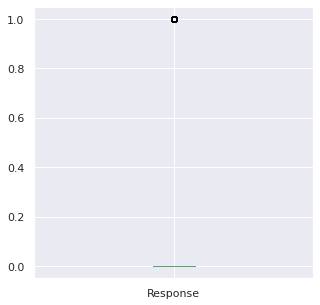

In [231]:
data1['Response'].plot(kind='box')    # caracteristica del tipo binaria, no se aprovecha tanto para la generacion de graficas, 
sns.set(rc={'figure.figsize':(5,5)})  #se procede más adelante a utilizar en caso de ser util
plt.show()

In [232]:
data1['Response'].mode()    # la mayoria de los clientes no responden a la campaña

0    0
dtype: int64

In [233]:
data1.groupby('Response').size() 

Response
0    1906
1     334
dtype: int64

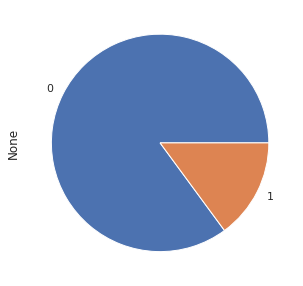

In [234]:
data1.groupby('Response').size().plot(kind = 'pie') 
sns.set(rc={'figure.figsize':(5,5)}) 
plt.show()

## Tablas de Analisis

Encontrará tablas, que resumen información por caracteristias, permiten ver la segmentación de los clientes por Edad, Ingresos, Comportamiento de Compra, Además de extraer información importante para perfilar el comportamiento de los clientes.

## Transformaciones de datos Necesarias
1.Crear columnas que agreguen valor al proceso de analisis de los datos

2.Transformar o cambiar columnas tipo odjeto a númerico para facilitar la manipulación de los datos

3.Crear un rangos o escalas en las caracteristicas que permita utilizarlas en las tablas pivote

In [235]:
data2 = data1.copy()   # con data2 vamos a proceder a proceder a convertir las caracteristicas objeto en numericas 

In [236]:
# Hay que transformar a numéricas las variables categóricas (object) para poder trabajar con ellas
data2.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

In [237]:
obj_df = data2.select_dtypes(include=['object']).copy() # se eligen las variables categoricas (object) y se hace una copia
print(obj_df.columns)

Index(['Education', 'Marital_Status'], dtype='object')


In [238]:
from sklearn.preprocessing import LabelEncoder

In [239]:
lb_encoder = LabelEncoder()

In [240]:
#crear un ciclo for para que a cada una de las variables que tengan formato 'object' las cambie a formato numero
for col in obj_df.columns:
  data2[col] = lb_encoder.fit_transform(data2[col])

In [241]:
# Conmprobando de nuevo tipo de las variables
data2.dtypes

ID                              int64
Year_Birth                      int64
Education                       int64
Marital_Status                  int64
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

Crear una columna para la edad del cliente

In [242]:
data1['Age'] = 2014 - data1['Year_Birth']   # la fecha 2014 se elige porque corresponde a la fecha en donde al parecer se realizó el estudio o de la fecha 
                                            # en la que proviene el dataset.  Age sería la edad de los clientes a la fecha 2014

In [243]:
data1.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age'],
      dtype='object')

In [244]:
data1['Age'].head(5)

0    57
1    60
2    49
3    30
4    33
Name: Age, dtype: int64

In [245]:
data1['Age'].min() # la edad minima es de 18 años

18

In [246]:
data1['Age'].max() # la edad maxima  es de 121 años

121

In [247]:
data1['Age'].mode()  # la edad que más se repite es 38 años 

0    38
dtype: int64

In [248]:
data1['Age'].mean()  # la edad promedio es de 45 años

45.19419642857143

In [249]:
data1.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,57
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,60
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,49


## Mostar Información por Edades y Rangos de Edades

Una tabla que muestre por edades el nivel de ingreso de los clientes

In [250]:
round(data1.pivot_table('Income', index= 'Age', aggfunc= 'mean',fill_value=0),2)

,Income
Age,
18,10960.50
19,60937.00
20,85449.33
21,74139.80
22,47830.15
23,60900.33
24,40919.28
25,42554.55
26,47947.76


<Figure size 1440x1440 with 0 Axes>

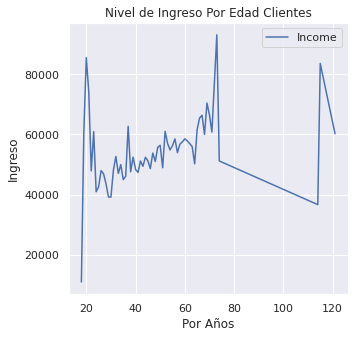

In [251]:
plt.figure(figsize = (20,20))
round(data1.pivot_table('Income', index= 'Age', aggfunc= 'mean',fill_value=0),2).plot()
plt.title("Nivel de Ingreso Por Edad Clientes")
plt.ylabel("Ingreso")
plt.xlabel("Por Años")
plt.show();

## Tabla Pivote por Rangos de Edad

Una tabla que permita ver los Ingresos por Rangos de Edad

In [252]:
data1['age_range'] = (data1['Age']//5)*5     # se crea una columna qu corresponde a rango de edad

In [253]:
round(data1.pivot_table(['Income'],['age_range'],aggfunc= 'mean',fill_value=0),2)

,Income
age_range,
15,46658.00
20,53683.17
25,43849.21
30,47567.93
35,50199.41
40,49754.75
45,52235.09
50,55498.55
55,56651.57


Tabla Pivote. 

Que muestre Información sobre la Edad, Ingreso y además si existe una diferencia entre aquellos que responden o no a las campañas publicitarias

En promedio por rangos de edad aquellos de mayor edad tienen mayor ingreso, y aquellos que dan respuesta positiva a la campaña tienen un mayor ingreso que los que no.

In [254]:
round(data1.pivot_table(['Income'],['age_range'],['Response'],aggfunc= 'mean',fill_value=0),2)    # Response  1 indica si el cliente aceptó la oferta en la ultima campaña, 0 que no.

Income          
Response          0         1
age_range                    
15         47169.80  45378.50
20         45447.38  82508.42
25         41942.80  55807.64
30         44090.53  59777.49
35         49649.64  54639.90
40         48883.83  53977.36
45         51511.21  57509.11
50         54076.08  65049.43
55         54758.11  68336.91
60         55579.22  61810.50
65         62803.75  66809.77
70         67080.67  57466.62
110        36640.00      0.00
115        83532.00      0.00
120        60182.00      0.00

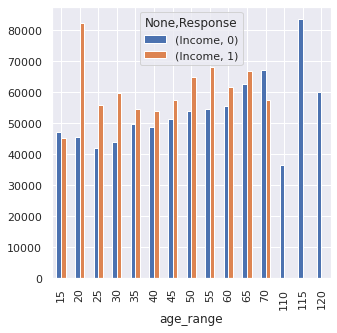

In [255]:
round(data1.pivot_table(['Income'],['age_range'],['Response'],aggfunc= 'mean',fill_value=0),2).plot(kind = 'bar' ) 
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [256]:
round(data1.pivot_table(['Income'],['age_range'],['Education'],aggfunc= 'mean',fill_value=0),2)

Income                                         
Education  2n Cycle     Basic Graduation    Master       PhD
age_range                                                   
15         57124.67  14421.00   46937.00      0.00      0.00
20         48948.80  18012.43   55769.06  81595.40  69926.00
25         32391.86  17403.20   46690.32  45802.89  53447.83
30         48668.90  25161.50   46197.49  41956.15  58285.64
35         39110.54  20756.83   53765.49  48525.91  55874.16
40         43827.58  18949.17   49222.01  52869.23  52596.16
45         59966.14  22796.75   52631.61  49687.66  53684.20
50         59967.78  23384.75   55747.72  58262.46  54169.41
55         58727.09  15056.00   56723.76  56986.33  56075.75
60         58877.89  20040.50   56744.48  53599.18  58446.58
65         77951.50  28389.00   62447.84  64005.14  64611.38
70             0.00      0.00   67273.33  63848.50  64221.50
110        36640.00      0.00       0.00      0.00      0.00
115            0.00      0.00       0.00      0.00  83532.00
120        60182.00      0.00       0.00      0.00      0.00

In [257]:
compras_promedio1 = data1[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','age_range']].\
groupby("age_range").mean().sort_values(by="age_range").reset_index()

In [258]:
compras_promedio1.head(12)

,age_range,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,15,203.428571,16.714286,233.000000,38.571429,41.857143,29.857143
1,20,349.907407,41.537037,298.537037,55.092593,34.592593,62.944444
2,25,228.656250,27.631250,173.037500,35.118750,29.875000,38.037500
3,30,240.384236,26.369458,160.068966,38.423645,25.990148,40.931034
4,35,244.310734,24.121469,141.573446,35.641243,25.598870,41.144068
5,40,268.948187,22.673575,148.500000,31.349741,24.626943,37.059585
6,45,306.375862,24.893103,150.658621,32.182759,24.351724,44.155172
7,50,372.620370,28.194444,163.643519,38.851852,26.310185,48.560185
8,55,356.326693,29.011952,185.063745,42.613546,29.095618,47.043825
9,60,344.602871,23.516746,166.330144,39.215311,26.693780,54.602871


## Tabla Pivote. 

**Que muestre Información por rangos de Edad, Ingresos y ademas según aquellos que se han quejado o no en los últimos 2 años.**

In [259]:
round(data1.pivot_table('MntWines', index= 'age_range', columns= 'Complain', aggfunc= 'mean',fill_value=0),2)

# Clientes que se han quejado y los que no , como es el comportamiento de compra de vinos por rango de edad

Complain,0,1
age_range,,
15,148.00,536.00
20,349.91,0.00
25,229.99,16.00
30,243.78,13.67
35,245.97,128.40
40,268.95,0.00
45,306.38,0.00
50,374.24,24.00
55,357.29,297.00


## Tablas Pivote Según El Comportamiento de Compra de los Clientes

según diferentes variables o condiciones, por edades, ingresos o educación.

<Figure size 1440x1440 with 0 Axes>

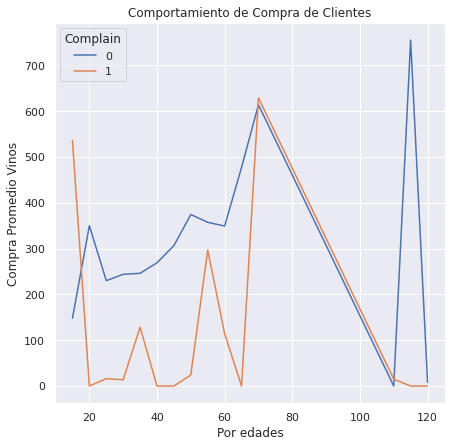

In [260]:
plt.figure(figsize = (20,20))
round(data1.pivot_table('MntWines', index= 'age_range', columns= 'Complain', aggfunc= 'mean',fill_value=0),2).plot()
plt.title("Comportamiento de Compra de Clientes")
plt.ylabel("Compra Promedio Vinos")
plt.xlabel("Por edades")
plt.show();

Tabla Pivote para Analizar el Comportamiento de Consumo por Productos

In [261]:
data1['Year'] = data1['Dt_Customer'].dt.year

In [262]:
data1.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'age_range', 'Year'],
      dtype='object')

In [263]:
compras_promedio = data1[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','Year']].\
groupby("Year").mean().sort_values(by="Year").reset_index()

Tabla Pivote que muestra por el año de ligamen del cliente con la empresa, y como se observa el promedio de consumo de los productos.

In [264]:
compras_promedio.head(5)       # se observan las compras promedio de los productos por año

,Year,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,2012,388.803644,29.718623,197.524291,44.473684,31.951417,53.012146
1,2013,300.317073,26.291001,165.540791,36.513036,26.904962,46.136249
2,2014,236.391382,23.296230,142.842011,33.524237,23.064632,31.535009


In [265]:
round(data1.pivot_table(['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds'],['Year'],aggfunc= 'mean',fill_value=0),2)

,MntFishProducts,MntFruits,MntGoldProds,MntMeatProducts,MntSweetProducts,MntWines
Year,,,,,,
2012,44.47,29.72,53.01,197.52,31.95,388.80
2013,36.51,26.29,46.14,165.54,26.90,300.32
2014,33.52,23.30,31.54,142.84,23.06,236.39


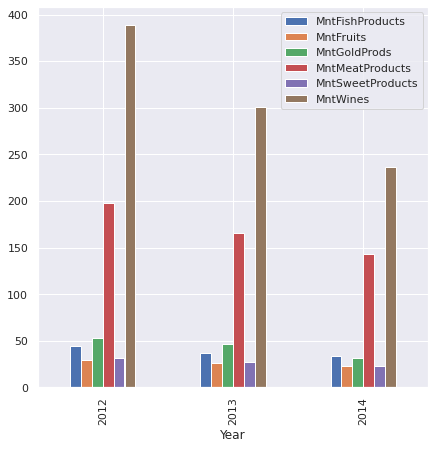

In [266]:
round(data1.pivot_table(['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds'],['Year'],aggfunc= 'mean',fill_value=0),2).plot(kind = 'bar')

# El comportamiento de compra de los clientes segmentado por el año, permite ver que la caracteristica que más compran los clientes es Bebidas Alcoholicas (Wines) seguidamente
# los prodcutos carnicos (Meat), ademas el nivel compra de los clientes viene en descenso (Los clientes están comprando menos)

## Tablas Pivotes que permitan Mostrar la Tendencia de Compra de los Diferentes Productos

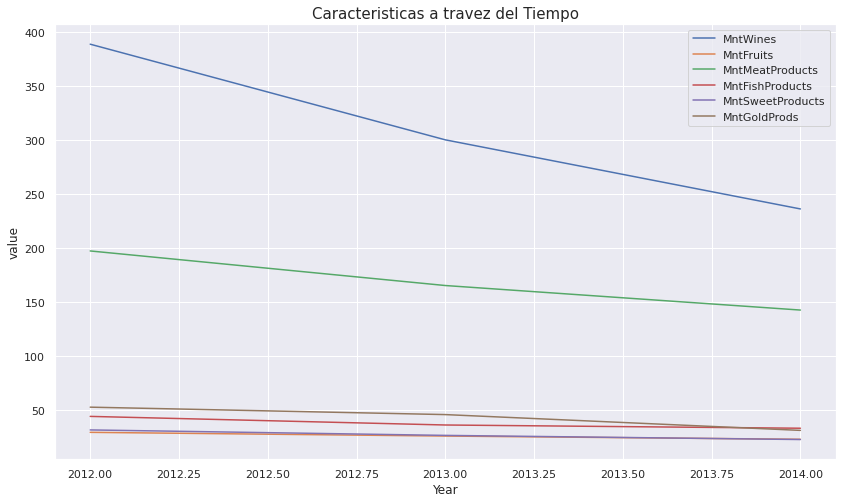

In [267]:
plt.figure(figsize=(14,8))
plt.title("Caracteristicas a travez del Tiempo", fontdict={"fontsize": 15})

lines = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']

for line in lines:
    ax = sns.lineplot(x='Year', y=line, data=compras_promedio)
plt.ylabel("value")
plt.legend(lines)

# El nivel compra de los clientes viene en descenso (Los clientes están comprando menos)

## Tabla Pivote que Muestra **Comprotamiento de Compra Según Estado Marital**

In [268]:
compras_promedio2 = data1[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','Marital_Status']].\
groupby("Marital_Status").mean().sort_values(by="Marital_Status").reset_index()

In [269]:
round((compras_promedio2),2) 

,Marital_Status,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,Absurd,355.50,84.50,312.50,205.50,30.50,204.00
1,Alone,184.67,4.00,26.33,7.67,7.00,27.00
2,Divorced,324.84,27.43,150.21,35.04,26.82,46.29
3,Married,299.48,25.73,160.68,35.38,26.70,42.82
4,Single,288.33,26.84,182.11,38.22,27.26,43.73
5,Together,306.83,25.35,168.10,38.99,26.12,42.99
6,Widow,369.27,33.09,189.29,51.39,39.01,56.77
7,YOLO,322.00,3.00,50.00,4.00,3.00,42.00


In [270]:
compras_promedio4 = data1[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases','Marital_Status']].\
groupby("Marital_Status").mean().sort_values(by="Marital_Status").reset_index()

In [271]:
round((compras_promedio4),2) 

,Marital_Status,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,Absurd,3.50,7.50,6.50
1,Alone,5.00,0.67,4.00
2,Divorced,4.31,2.67,5.82
3,Married,4.09,2.62,5.85
4,Single,3.87,2.60,5.64
5,Together,4.08,2.68,5.74
6,Widow,4.62,3.32,6.42
7,YOLO,7.00,1.00,6.00


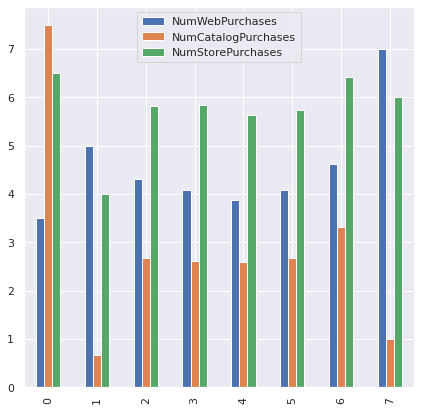

In [272]:
round((compras_promedio4),2).plot(kind = 'bar')
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

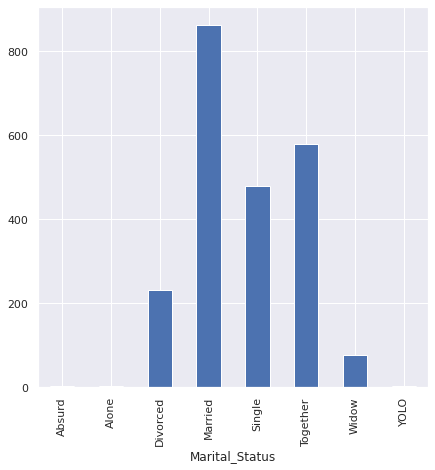

In [273]:
data1.groupby('Marital_Status').size().plot(kind = 'bar')
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

# El mayor grupo al que pertenecen los clientes es al grupo de Casados, union libre y le sigue la condicion sontero(single)

In [274]:
round(data1.pivot_table('MntWines', index= 'Marital_Status', columns= 'Complain', aggfunc= 'mean',fill_value=0),2)

# El nivel de consumo de bebidas (wines) de los clientes según el estatus marital y según si se quejan o no, 
# nos indica que el grupo de clientes Viudos (widow) son los que más consumen bebidas (wines) y le siguen los 
# que consideran las personas con estatus Absurd y los Divorciados.
# el mayor consumo se presenta en aquellos que no se quejan.   

Complain,0,1
Marital_Status,,
Absurd,355.50,0.00
Alone,184.67,0.00
Divorced,327.53,16.00
Married,300.64,175.50
Single,289.30,211.83
Together,308.03,168.40
Widow,369.27,0.00
YOLO,322.00,0.00


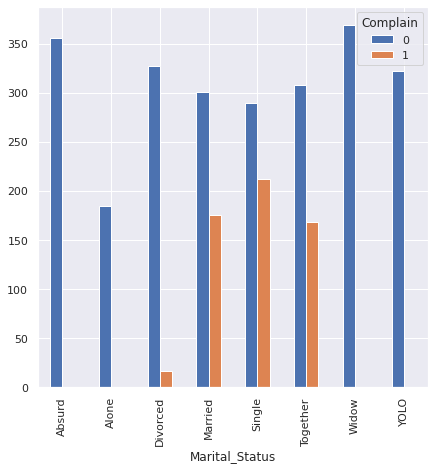

In [275]:
round(data1.pivot_table('MntWines', index= 'Marital_Status', columns= 'Complain', aggfunc= 'mean',fill_value=0),2).plot(kind = 'bar')

In [276]:
data1.pivot_table('NumWebPurchases', index= ('Marital_Status'), aggfunc='mean')

,NumWebPurchases
Marital_Status,
Absurd,3.500000
Alone,5.000000
Divorced,4.310345
Married,4.087963
Single,3.872917
Together,4.081034
Widow,4.623377
YOLO,7.000000


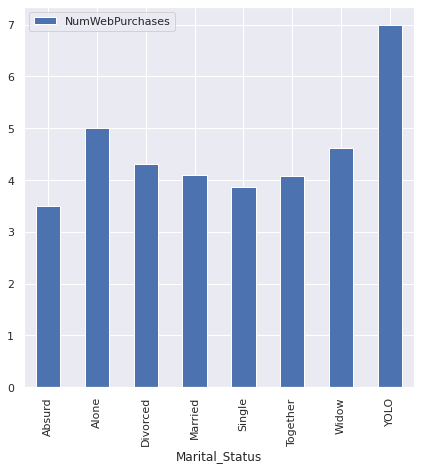

In [277]:
data1.pivot_table('NumWebPurchases', index= ('Marital_Status'), aggfunc='mean').plot(kind = 'bar')

# El comportamiento de compra por medio de la Web , permite observar que lo que más compran
# por el medio de la WEB corresponde aquellos que se denominan YOLO y los alone.

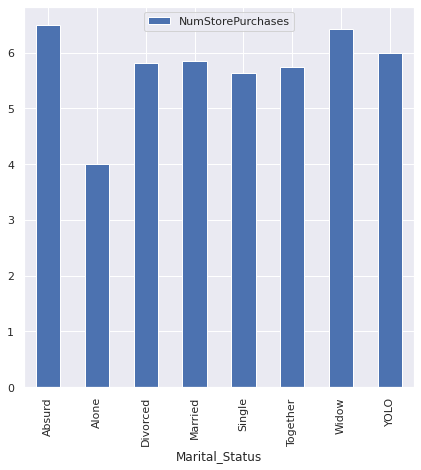

In [278]:
data1.pivot_table('NumStorePurchases', index= ('Marital_Status'), aggfunc='mean').plot(kind = 'bar')

Tabla Pivoteque permite ver el nivel de consumo de productos alcoholicos según el nivel de estudio y estatus marital

In [279]:
round(data1.pivot_table('MntWines',['Education','Marital_Status'],['Response'],aggfunc= 'mean',fill_value=0),2)

Response                        0       1
Education  Marital_Status                
2n Cycle   Divorced        334.11  412.60
           Married         137.40  313.38
           Single          168.23  425.50
           Together        181.37  315.33
           Widow           221.80    0.00
Basic      Divorced          0.00    0.00
           Married          15.20    0.00
           Single            3.11    0.00
           Together          1.75    3.50
           Widow             3.00    0.00
Graduation Absurd            0.00  471.00
           Alone             5.00    0.00
           Divorced        277.93  419.79
           Married         253.49  445.63
           Single          210.14  467.56
           Together        281.02  569.32
           Widow           272.83  423.50
Master     Absurd          240.00    0.00
           Alone           534.00    0.00
           Divorced        268.58  471.00
           Married         294.95  596.40
           Single          354.07  476.78
           Together        291.67  391.75
           Widow           344.83  522.67
PhD        Alone             0.00   15.00
           Divorced        302.97  559.17
           Married         391.01  628.16
           Single          296.96  509.20
           Together        349.82  752.75
           Widow           408.94  673.14
           YOLO            322.00  322.00

In [280]:
round(data1.pivot_table(['MntWines','MntFruits','MntMeatProducts'],['Marital_Status'],['Response'],aggfunc= 'mean',fill_value=0),2)

# Como se comporta el consumo de los clientes según su estatus marital y si responden o no a las campañas.
# Aquellos que reaccionan positivamente a las campañas presentan un nivel de consumo mayor que aquellos no 
# reaccionan a la camapaña salvo en la categoria de marital estatus Absurd y el producto Meat, donde los que 
# no responden positivamente a la campaña tienen un mayor consumo (muy alto) que aquellos que sí responden

# Response: 1 indica si el cliente aceptó la oferta en la ultima campaña, 0 que no

MntFruits         MntMeatProducts         MntWines        
Response               0       1               0       1        0       1
Marital_Status                                                           
Absurd             67.00  102.00          500.00  125.00   240.00  471.00
Alone               6.00    0.00           35.50    8.00   269.50   15.00
Divorced           22.28   47.17          112.60  294.38   284.97  477.71
Married            24.62   34.45          146.52  271.40   271.59  517.51
Single             23.23   39.57          141.15  326.63   234.43  478.53
Together           24.08   36.33          154.02  290.15   280.04  538.93
Widow              32.88   33.74          158.67  282.74   311.12  546.79
YOLO                3.00    3.00           50.00   50.00   322.00  322.00

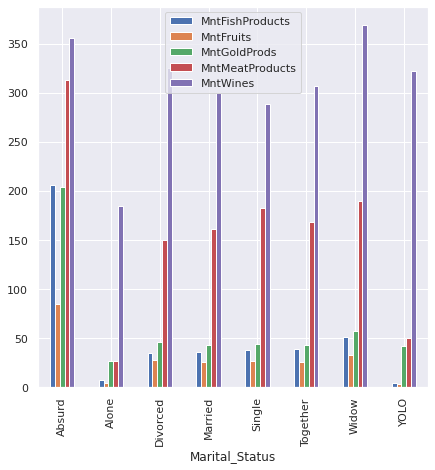

In [281]:
round(data1.pivot_table(['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntGoldProds'],['Marital_Status'],aggfunc= 'mean',fill_value=0),2).plot(kind = 'bar')

Comportamiento de Compra según Grado Acadécimo

In [282]:
compras_promedio3 = data1[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','Education']].\
groupby("Education").mean().sort_values(by="Education").reset_index()

In [283]:
round((compras_promedio3),2) 

,Education,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,2n Cycle,198.18,28.96,141.26,47.48,34.25,46.40
1,Basic,7.24,11.11,11.44,17.06,12.11,22.83
2,Graduation,284.27,30.77,179.49,43.15,31.37,50.85
3,Master,333.08,21.65,163.38,32.10,21.18,40.40
4,PhD,404.50,20.05,168.60,26.73,20.22,32.31


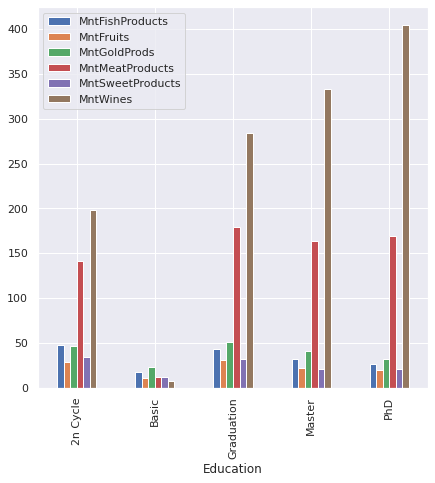

In [284]:
round(data1.pivot_table(['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds'],['Education'],aggfunc= 'mean',fill_value=0),2).plot(kind = 'bar')

In [285]:
compras_promedio5 = data1[['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','Education']].\
groupby("Education").mean().sort_values(by="Education").reset_index()

In [286]:
round((compras_promedio5),2) 

# Comportamiento de compra de los clientes según su nievel de educatico, el mayor comportamiento de compra es por medio de 
# de las tiendas, seguidamente en la web y le sigue las compras por catalogo.

,Education,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,2n Cycle,2.25,3.73,2.32,5.51
1,Basic,1.80,1.89,0.48,2.85
2,Graduation,2.31,4.13,2.73,5.83
3,Master,2.43,4.03,2.57,5.90
4,PhD,2.37,4.42,2.97,6.06


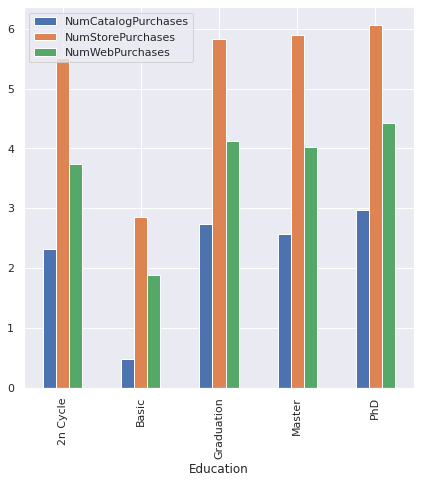

In [287]:
round(data1.pivot_table(['NumWebPurchases','NumCatalogPurchases','NumStorePurchases'],['Education'],aggfunc= 'mean',fill_value=0),2).plot(kind = 'bar')

# Se observa que las compras en las tienas es la que los clientes prefieren más, y aquellos que más van a ir a las
# tiendas serán por nivel educativo PhD, Master y Graduation

In [288]:
data1[['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].describe()   # en promedio las personas realizan mas compras en la tienda y en segundo lugar por la web

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
count,2240.000000,2240.000000,2240.000000,2240.000000
mean,2.325000,4.084821,2.662054,5.790179
std,1.932238,2.778714,2.923101,3.250958
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,0.000000,3.000000
50%,2.000000,4.000000,2.000000,5.000000
75%,3.000000,6.000000,4.000000,8.000000
max,15.000000,27.000000,28.000000,13.000000


Tabla Pivote que Muestre el Total de Consumo

In [289]:
data1['Total_spend'] = data1['MntWines']+data1['MntFruits']+data1['MntMeatProducts']+data1['MntFishProducts']+data1['MntSweetProducts']+data1['MntGoldProds']
# se crea una columna que represente el total de compras.

In [290]:
data1.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,age_range,Year,Total_spend
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,57,55,2012,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,60,60,2014,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,49,45,2013,776


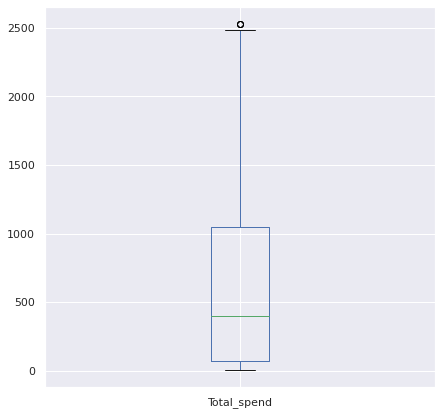

In [291]:
data1['Total_spend'].plot(kind='box') 
sns.set(rc={'figure.figsize':(5,5)}) 
plt.show()

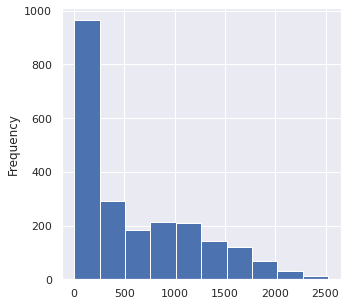

In [292]:
data1['Total_spend'].plot(kind='hist') 
sns.set(rc={'figure.figsize':(5,5)}) 
plt.show() 

## Tabla Pivote que Muestra el Total de Compra por Estatus Marital (estado civil)
### y entre aquellos que responden o no a la campaña

In [293]:
round(data1.pivot_table(['Total_spend'],['Marital_Status'],['Response'],aggfunc= 'mean',fill_value=0),2)   # 1 indica si el cliente aceptó la oferta en la ultima campaña, 0 que no.

Total_spend         
Response                 0        1
Marital_Status                     
Absurd             1169.00  1216.00
Alone               360.50    49.00
Divorced            510.58   994.15
Married             542.52   968.18
Single              496.66   993.99
Together            562.04  1010.08
Widow               644.10  1027.95
YOLO                424.00   424.00

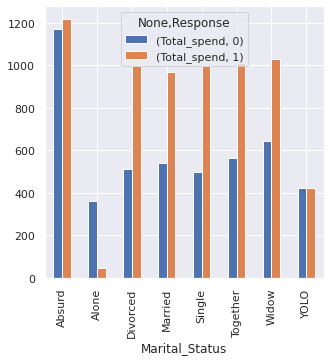

In [294]:
round(data1.pivot_table(['Total_spend'],['Marital_Status'],['Response'],aggfunc= 'mean',fill_value=0),2).plot(kind= 'bar')

La mayoria de los clientes que respondieron a la campaña presentaron un nivel de compra mayor que aquellos que no respondieron a la campaña publicitaria o promociones.

In [295]:
data1['Total_spend'].min()

5

In [296]:
data1['Total_spend'].max()

2525

In [297]:
data1['Total_spend'].mean()   # el consumo promedio o compra promedio de los clientes corresponde a 605.79

605.7982142857143

Mostrar el Total de Hijos por Hogar tanto Niños y Adolescentes

In [298]:
data1['Total_Sons'] = data1['Kidhome']+data1['Teenhome']
# se crea una columna que represente el total de hijos por hogar

In [299]:
data1['Total_Sons'].head(3)

0    0
1    2
2    0
Name: Total_Sons, dtype: int64

In [300]:
data1['Total_Sons'].min()   # una vez que se suman las caracteristicas kid y teen , el valor minimo de hijos por hogar es cero

0

In [301]:
data1['Total_Sons'].max()   # una vez que se suman las caracteristicas kid y teen , el valor maximo de hijos por hogar es de 3

3

In [302]:
data1['Total_Sons'].mean()    # una vez que se suman las caracteristicas kid y teen, el valor promedio de hijos por hogar se acerca a 1

0.9504464285714286

In [303]:
round(data1.pivot_table(['Total_spend'],['NumDealsPurchases'],aggfunc= 'mean',fill_value=0),2)

,Total_spend
NumDealsPurchases,
0,1234.76
1,720.34
2,429.71
3,474.36
4,498.51
5,581.84
6,592.64
7,638.30
8,698.07


<Figure size 1440x1440 with 0 Axes>

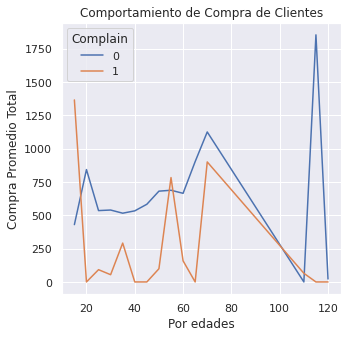

In [304]:
plt.figure(figsize = (20,20))
round(data1.pivot_table('Total_spend', index= 'age_range', columns= 'Complain', aggfunc= 'mean',fill_value=0),2).plot()
plt.title("Comportamiento de Compra de Clientes")
plt.ylabel("Compra Promedio Total")
plt.xlabel("Por edades")
plt.show();

Tabla Total Spend, Education y Marital Status según si Responden o No a las Campañas

In [305]:
round(data1.pivot_table('Total_spend',['Education','Marital_Status'],['Response'],aggfunc= 'mean',fill_value=0),2)

Response                         0        1
Education  Marital_Status                  
2n Cycle   Divorced         565.17   960.80
           Married          394.44   691.62
           Single           450.74   995.67
           Together         476.52   808.67
           Widow            677.20     0.00
Basic      Divorced          29.00     0.00
           Married          122.85     0.00
           Single            57.72     0.00
           Together          55.75    60.50
           Widow            102.00     0.00
Graduation Absurd             0.00  1216.00
           Alone             89.00     0.00
           Divorced         536.51  1036.95
           Married          559.72   924.14
           Single           503.60  1020.17
           Together         598.57  1155.90
           Widow            618.07   962.67
Master     Absurd          1169.00     0.00
           Alone            632.00     0.00
           Divorced         471.10   965.67
           Married          493.95  1162.93
           Single           666.86   996.78
           Together         542.11   707.67
           Widow            603.67  1155.83
PhD        Alone              0.00    49.00
           Divorced         455.59   967.72
           Married          657.95  1005.22
           Single           470.66   946.60
           Together         593.01  1144.42
           Widow            724.94   974.29
           YOLO             424.00   424.00

## Total de Compra por Rangos de Edad y Respuesta a la Campaña

1 indica si el cliente aceptó la oferta en la ultima campaña, 0 que no.

<Figure size 1440x1440 with 0 Axes>

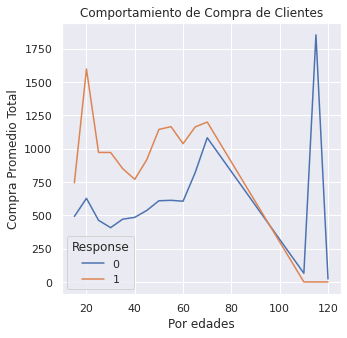

In [306]:
plt.figure(figsize = (20,20))                                 
round(data1.pivot_table('Total_spend', index= 'age_range', columns= 'Response', aggfunc= 'mean',fill_value=0),2).plot()
plt.title("Comportamiento de Compra de Clientes")
plt.ylabel("Compra Promedio Total")
plt.xlabel("Por edades") 
plt.show();

<Figure size 1440x1440 with 0 Axes>

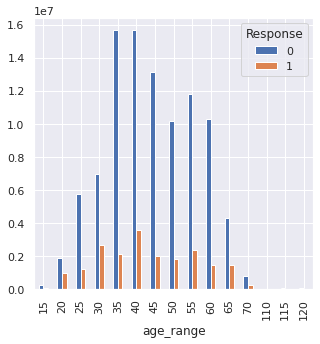

In [307]:
plt.figure(figsize = (20,20))   
round(data1.pivot_table('Income', index= 'age_range', columns= 'Response', aggfunc= 'sum',fill_value=0),2).plot(kind = 'bar')
plt.show();

## Comportamiento de Compra Total por el Total de Hijos por hogar

In [308]:
round(data1.pivot_table(['Total_spend'],['Total_Sons'],aggfunc= 'mean',fill_value=0),2)

,Total_spend
Total_Sons,
0,1106.03
1,472.73
2,245.95
3,274.60


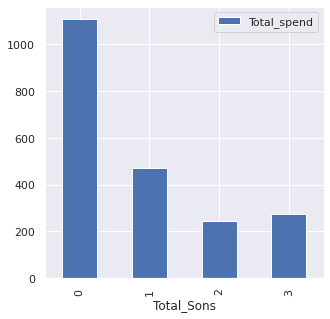

In [309]:
round(data1.pivot_table(['Total_spend'],['Total_Sons'],aggfunc= 'mean',fill_value=0),2).plot(kind = 'bar')   # según esta informacion aquellos que realizan más monto de compras son los que no tienen hijos

## Correlaciones de Caracteristicas

In [310]:
data2['Age'] = 2014 - data2['Year_Birth']

In [311]:
data2.corr() 

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
ID,1.000000,0.000028,-0.003839,0.019580,0.012996,0.002406,-0.002580,-0.046524,-0.022878,0.004600,-0.004437,-0.024475,-0.007642,-0.013438,-0.037166,-0.018924,-0.003440,-0.014927,-0.007446,-0.036040,-0.025387,-0.007517,-0.021614,-0.015061,0.033883,NaN,NaN,-0.021968,-0.000028
Year_Birth,0.000028,1.000000,-0.171390,-0.060580,-0.160899,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,-0.030872,-0.041625,-0.018133,-0.061818,-0.060846,-0.145040,-0.121275,-0.128272,0.121139,0.061774,-0.060510,0.007123,-0.005930,-0.006539,-0.030128,NaN,NaN,0.021325,-1.000000
Education,-0.003839,-0.171390,1.000000,0.007090,0.119979,-0.045564,0.118485,-0.011728,0.197576,-0.080412,0.033625,-0.112223,-0.105217,-0.095489,0.030075,0.081908,0.070782,0.070483,-0.040281,0.005836,0.053266,0.033346,-0.010845,0.021369,-0.050540,NaN,NaN,0.090819,0.171390
Marital_Status,0.019580,-0.060580,0.007090,1.000000,0.021145,-0.022553,-0.003596,0.014159,0.008205,0.000593,0.030689,0.035808,0.017382,0.001688,-0.021772,-0.001894,0.015125,0.001412,-0.031210,-0.027113,0.014381,0.012817,-0.017097,0.018417,-0.005718,NaN,NaN,-0.011403,0.060580
Income,0.012996,-0.160899,0.119979,0.021145,1.000000,-0.425326,0.018965,-0.004061,0.576903,0.428791,0.577805,0.437564,0.436131,0.321938,-0.082315,0.380554,0.586826,0.526600,-0.549785,-0.016064,0.182718,0.334893,0.274891,0.087581,-0.027187,NaN,NaN,0.132867,0.160899
Kidhome,0.002406,0.230176,-0.045564,-0.022553,-0.425326,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,-0.370673,-0.349595,0.221798,-0.361647,-0.502237,-0.499683,0.447846,0.014674,-0.161600,-0.205634,-0.172339,-0.081716,0.040207,NaN,NaN,-0.080008,-0.230176
Teenhome,-0.002580,-0.352111,0.118485,-0.003596,0.018965,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,-0.162475,-0.021725,0.387741,0.155500,-0.110769,0.050695,0.134884,-0.042677,0.038886,-0.191050,-0.140090,-0.015605,0.003138,NaN,NaN,-0.154446,0.352111
Recency,-0.046524,-0.019871,-0.011728,0.014159,-0.004061,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,0.022670,0.016693,-0.001098,-0.010726,0.025110,0.000799,-0.021445,-0.032991,0.018826,0.000129,-0.019283,-0.001781,0.013231,NaN,NaN,-0.198437,0.019871
MntWines,-0.022878,-0.157773,0.197576,0.008205,0.576903,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,0.386581,0.387516,0.010940,0.542265,0.635226,0.642100,-0.320653,0.062202,0.373286,0.472613,0.354133,0.205907,-0.039007,NaN,NaN,0.247254,0.157773
MntFruits,0.004600,-0.017917,-0.080412,0.000593,0.428791,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,0.567164,0.392995,-0.132114,0.296735,0.487917,0.461758,-0.418383,0.014727,0.010152,0.215833,0.194748,-0.009773,-0.005166,NaN,NaN,0.125289,0.017917


In [312]:
cor_matrix = data2.corr().abs()   # esta versión permite colorear aquellas correlaciones que nos llaman la atención tanto positivas como negativas
cor_matrix.style.background_gradient(sns.light_palette('red', as_cmap=True))   # código es muy útil ayuda cuando hay muchas variables

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
ID,1.000000,0.000028,0.003839,0.019580,0.012996,0.002406,0.002580,0.046524,0.022878,0.004600,0.004437,0.024475,0.007642,0.013438,0.037166,0.018924,0.003440,0.014927,0.007446,0.036040,0.025387,0.007517,0.021614,0.015061,0.033883,nan,nan,0.021968,0.000028
Year_Birth,0.000028,1.000000,0.171390,0.060580,0.160899,0.230176,0.352111,0.019871,0.157773,0.017917,0.030872,0.041625,0.018133,0.061818,0.060846,0.145040,0.121275,0.128272,0.121139,0.061774,0.060510,0.007123,0.005930,0.006539,0.030128,nan,nan,0.021325,1.000000
Education,0.003839,0.171390,1.000000,0.007090,0.119979,0.045564,0.118485,0.011728,0.197576,0.080412,0.033625,0.112223,0.105217,0.095489,0.030075,0.081908,0.070782,0.070483,0.040281,0.005836,0.053266,0.033346,0.010845,0.021369,0.050540,nan,nan,0.090819,0.171390
Marital_Status,0.019580,0.060580,0.007090,1.000000,0.021145,0.022553,0.003596,0.014159,0.008205,0.000593,0.030689,0.035808,0.017382,0.001688,0.021772,0.001894,0.015125,0.001412,0.031210,0.027113,0.014381,0.012817,0.017097,0.018417,0.005718,nan,nan,0.011403,0.060580
Income,0.012996,0.160899,0.119979,0.021145,1.000000,0.425326,0.018965,0.004061,0.576903,0.428791,0.577805,0.437564,0.436131,0.321938,0.082315,0.380554,0.586826,0.526600,0.549785,0.016064,0.182718,0.334893,0.274891,0.087581,0.027187,nan,nan,0.132867,0.160899
Kidhome,0.002406,0.230176,0.045564,0.022553,0.425326,1.000000,0.036133,0.008827,0.496297,0.372581,0.437129,0.387644,0.370673,0.349595,0.221798,0.361647,0.502237,0.499683,0.447846,0.014674,0.161600,0.205634,0.172339,0.081716,0.040207,nan,nan,0.080008,0.230176
Teenhome,0.002580,0.352111,0.118485,0.003596,0.018965,0.036133,1.000000,0.016198,0.004846,0.176764,0.261160,0.204187,0.162475,0.021725,0.387741,0.155500,0.110769,0.050695,0.134884,0.042677,0.038886,0.191050,0.140090,0.015605,0.003138,nan,nan,0.154446,0.352111
Recency,0.046524,0.019871,0.011728,0.014159,0.004061,0.008827,0.016198,1.000000,0.016064,0.004306,0.023056,0.001079,0.022670,0.016693,0.001098,0.010726,0.025110,0.000799,0.021445,0.032991,0.018826,0.000129,0.019283,0.001781,0.013231,nan,nan,0.198437,0.019871
MntWines,0.022878,0.157773,0.197576,0.008205,0.576903,0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,0.386581,0.387516,0.010940,0.542265,0.635226,0.642100,0.320653,0.062202,0.373286,0.472613,0.354133,0.205907,0.039007,nan,nan,0.247254,0.157773
MntFruits,0.004600,0.017917,0.080412,0.000593,0.428791,0.372581,0.176764,0.004306,0.389637,1.000000,0.543105,0.594804,0.567164,0.392995,0.132114,0.296735,0.487917,0.461758,0.418383,0.014727,0.010152,0.215833,0.194748,0.009773,0.005166,nan,nan,0.125289,0.017917


## Información de las Correlaciones

Existe una correlacion positiva alta en entre la caracteristica Income y las caracteristas **MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts	, MntGoldProds**.  Por lo tanto si aumenta Income se generará un aumento en las otras caracteristicas.

Existe una correlacion alta entre la caracteristica de DeaslPurchase con las caracteristicas de **Kidhome y TeenHome**, entre mayor cantidad de hijos por hogar, mayor la cantidad de compras realizadas con descuentos.  Correlacion positiva, si aumenta una tambien umenta la otra.

Existe una correlacion alta entre las caracteristicas de los productos ( **MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts , MntGoldProds**.) y la caracteristica de compras en la tienda (NumstorePurchases) si aumenta una tambien aumenta la otra.

Existe correlacion positiva entre **Income y Kidhome**, de un 0.42, entonces si incrementa el valor de una genera un incremento de la otra.  Las personas con mayor nivel económico parecen estar más dispuestos a tener hijos.

La caracteristica de **Response** tiene una correlacion positiva con las caracteristicas **AcceptedCmp5 y AcceptedCmp1**

la caracteristica **MntWines** presenta correlacion positiva con **Income y Kidhome**, por lo que indica que al aumentar una tambien incrementa la otra, por lo tanto a mayor numero de hijos, puede presentar un mayor numero de compra de MntWines, y ademas que a mayor Income mayor nivel de compra de la caracteristicas MntWines.

**NumCatalogPurchases** tiene alta correslacion con las caracteristicas **MntWines y MntMeatProducts**, lo que indica que si aumenta una tambien la otra lo hará.

**Age** la edad de los clientes tiene correlación positiva con la caracteristicas **TeenHome**, por lo tanto si incrementa una tambien lo hará la otra.   Lo que indique que aquellos que presentan hijos adolescentes en el hogar son personas que pasan cierta edad.

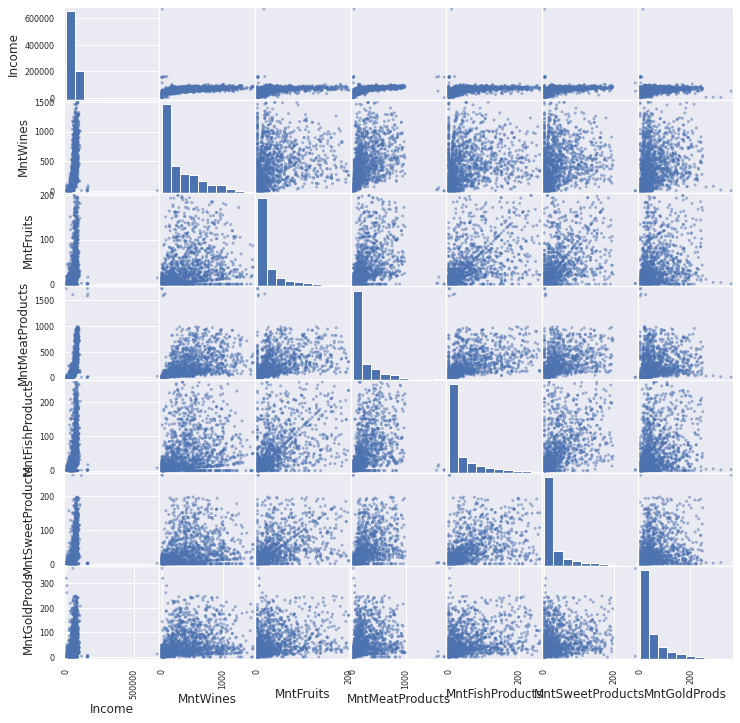

In [313]:
from pandas.plotting import scatter_matrix 
scatter_matrix((data2[['Income',"MntWines","MntFruits",'MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']]),figsize = (12, 12));

Cuando un cliente compra Fruits, hay alta posibilidad que compra Wines o Meat, por la alta correlacion que existe entre estas caracteristicas.


## Grafica de Correlaciones

In [314]:
data3 = data2.iloc[:,[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,28,29]]

In [315]:
data3

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,2,4,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,57
1,2,4,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,60
2,2,5,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,49
3,2,5,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,30
4,4,3,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,3,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,47
2236,4,5,64014.0,2,1,2014-10-06,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,68
2237,2,2,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,33
2238,3,5,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,58


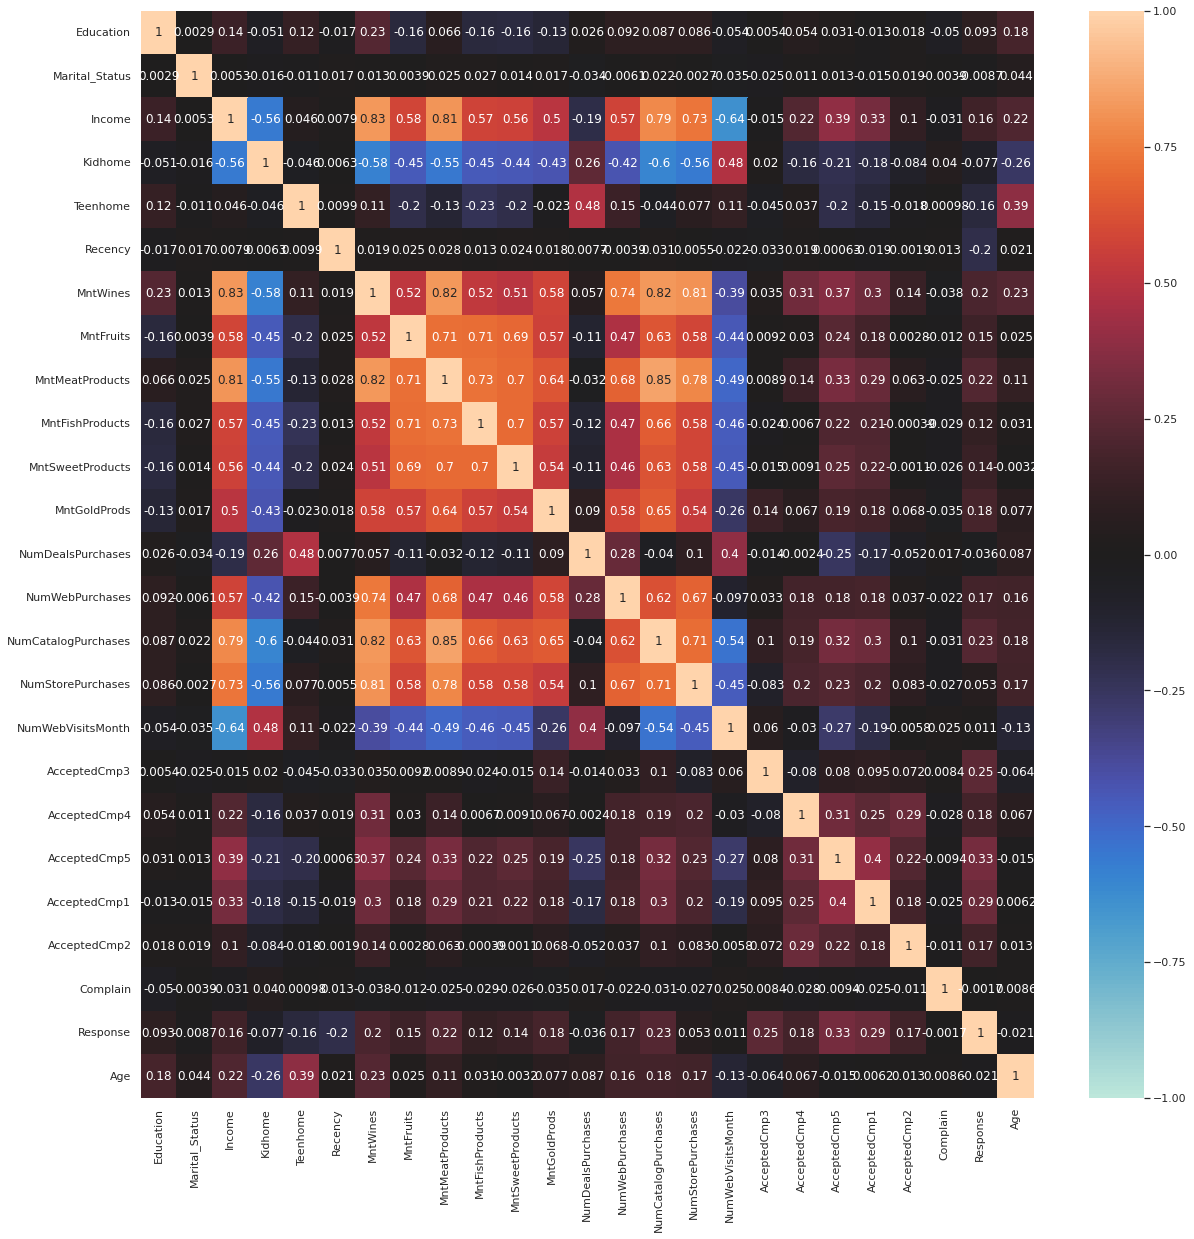

In [316]:
f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(data3.corr(method='spearman'),annot=True,vmin=-1, vmax=1, center= 0)
plt.show()

Correlacion alta positiva entre la caracteristica de incoe y mntWines, 0.83. lo que indica en que si aumenta una tambien aumenta la otra, a mayor ingreso mayor nivel de compra de wines (bebidas alcoholicas)

Income presenta tambien correlacion alta con las otras caracteristicas de los productos MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds. Si aumenta una tambien lo hará la otra.
lo que indica que a mayor nivel de ingrso mayor nivel de compra de estos productos.

La caracteristica de NumDealsPurchases tiene una correlacion positiva con las caracteristicas que indican si hay hijos en el hogar (Kidhome,Teenhome) lo que indica que a mayor hijos o presencia de los mismos mayor compra con descuentos van a presentar los clientes.

NumCatalogPurchases tiene alta correslacion con las caracteristicas MntWines y MntMeatProducts, lo que indica que si aumenta una tambien la otra lo hará.

La Caracteristica **Response** tiene correlacion media con MntMeatProducts,MntWines, por lo que si hay una respuesta positiva en las campañas, posiblemente existirá un aumento en las caracteristicas sitadas.

Mientras que la caracteristica **Response** tiene correlación negativa con Recency, lo que indica que al aumentar una disminuye la otra, por lo tanto a mayor días desde la compra del cliente, menor reacción positiva por parte del cliente hacia la campaña.

Existe una correlacion negativa entre la caracteristica NumWebVisitsMonth, y las caracteristicas de las compras de los productos **MntWines** , **MntFruits**, **MntMeatProducts**, **MntFishProducts**, **MntSweetProducts**, **MntGoldProds**, por lo tanto si aumenta una disminuye la otra.

NumWebVisitsMonth tiene una alta correlacion negativa con la caracteristica **Income** por lo que si incrementa una entonces disminuye la otra.

##ANOVA

In [317]:
import scipy.stats as stats  

In [318]:
from sklearn.preprocessing import LabelEncoder

In [319]:
lb_encoder = LabelEncoder()

In [320]:
print("Influencia del Respuesta campana sobre la vistia web") 
print(stats.f_oneway(data3[data3["Response"]== 0]["NumWebVisitsMonth"], data3[data3["Response"]== 1]["NumWebVisitsMonth"]))
print()
print("Influencia del Respuesta campana sobre compra de frutas") 
print(stats.f_oneway(data3[data3["Response"]== 0]["MntFruits"], data3[data3["Response"]== 1]["MntFruits"]))
print()
print("Influencia del Respuesta campana sobre Las Ultima compra") 
print(stats.f_oneway(data3[data3["Response"]== 0]["Recency"], data3[data3["Response"]== 1]["Recency"]))
print()

Influencia del Respuesta campana sobre la vistia web
F_onewayResult(statistic=0.035569030632842884, pvalue=0.850425363665631)

Influencia del Respuesta campana sobre compra de frutas
F_onewayResult(statistic=35.690773060613886, pvalue=2.6831159908772832e-09)

Influencia del Respuesta campana sobre Las Ultima compra
F_onewayResult(statistic=91.73834607514921, pvalue=2.5203765627580955e-21)



Se observa que el nivel de Respuesta positiva o no a la campaña influye en las visitas a las paginas web. pv  0.85  >= 0.05

Así como la Repuesta positiva o no a la campaña influye en el consumo o compras de los clientes.    pv 2.68   >= 0.05

De igual forma la Repuesta positiva o no a la campaña influye en los días que tiene una persona de su ultima compra (influye en que vuelva a comprar o compre más seguido)   pv 2.52   >= 0.05

**Datos e Información sobre la Influencia de la Publicidad y las Decisiones de Compra de los Clientes**.

Con respecto a esto se procede a citar algunos aspectos de la influencia de la publicidad y como esta promueve el consumo:

Una de las funciones de la publicidad es **Persuadir**, se crea preferencia por la marca, se debe convencer a los consumidores de que compren en el momento, como también que acepten visitas por el equipo de ventas.

La función de la publicidad no es vender: la publicidad es responsable de crear condiciones para la venta de productos. Para ello, transmite la idea al segmento de mercado objetivo, esperando que pueda coincidir con la idea y tenerla en cuenta a la hora de comprar.

 han identificado diferentes factores que afectan la intención de compra entre los cuales se encuentran: la publicidad, el brand equity y el brand engagement. La publicidad actúa como un divulgador de información o de ideas con la
intención de cambiar el comportamiento de un grupo de personas para que piense o actúe de determinada manera, también actúa como un diferenciador de una marca frente a la competencia. 

## Modelo de Machine Learning

In [321]:
data3 = data2.iloc[:,[2,3,4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,28,29]]

In [322]:
data3.head(3)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,2,4,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,57
1,2,4,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,60
2,2,5,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,49


In [323]:
data3.dtypes

Education                int64
Marital_Status           int64
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Response                 int64
Age                      int64
dtype: object

In [324]:
X = data3  # Renombrando variable para utilizarla en Scikit-Learn

In [325]:
# Normalizando dataframe
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [326]:
# Importando PCA
pca = PCA()
pca.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [327]:
evr = pca.explained_variance_ratio_
evr

array([0.26071465, 0.08314389, 0.07662967, 0.05805226, 0.046901  ,
       0.04128834, 0.04013911, 0.03993212, 0.03783773, 0.03331178,
       0.02985145, 0.02775495, 0.02546598, 0.02437783, 0.0234177 ,
       0.02125227, 0.02067995, 0.01855946, 0.01728875, 0.01629897,
       0.01506885, 0.01244702, 0.01213377, 0.00975247, 0.00770002])

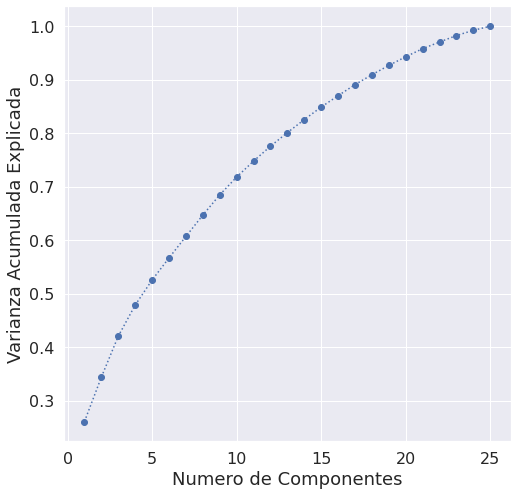

In [328]:
# Ploteando grafico de Componentes principales
fig = plt.figure(figsize=(8,8))
plt.plot(range(1, len(X.columns)+1), evr.cumsum(), marker='o', linestyle=':')
plt.xlabel('Numero de Componentes', fontsize=18)
plt.ylabel('Varianza Acumulada Explicada',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [329]:
# Iteracion para comprobar numero de componentes optimos a utilizar por su nivel de varianza

for i, exp_var in enumerate(evr.cumsum()):
    if exp_var >= 0.8:
        n_comps = i + 1
        break
print("Numero de Componentes Optimos:", n_comps)
pca = PCA(n_components=n_comps)
pca.fit(X_std)
scores_pca = pca.transform(X_std)

Numero de Componentes Optimos: 13


##Algoritmo K-means

In [330]:
# Encontrando el punto del codo de la curva de WCSS (dentro de la suma de cuadrados) usando el KneedLocator
wcss = []
max_clusters = 21
for i in range(1, max_clusters):
    kmeans_pca = KMeans(i, init='k-means++', random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)
n_clusters = KneeLocator([i for i in range(1, max_clusters)], wcss, curve='convex', direction='decreasing').knee
print("Numero de Clusters Optimos:", n_clusters)

Numero de Clusters Optimos: 6


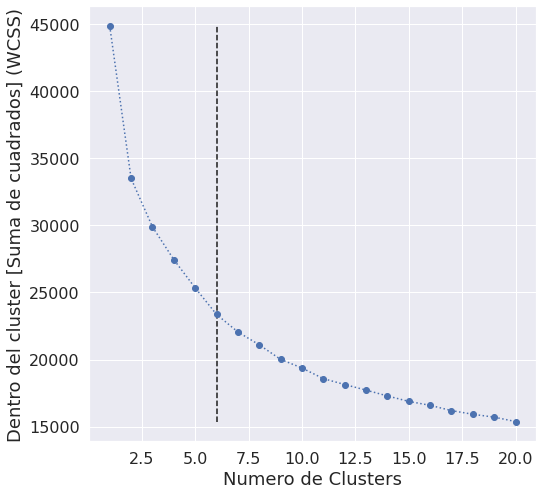

In [331]:
# Ploteando grafico 
fig = plt.figure(figsize=(8,8))
plt.plot(range(1, 21), wcss, marker='o', linestyle=':')
plt.vlines(KneeLocator([i for i in range(1, max_clusters)], wcss, curve='convex', 
                       direction='decreasing').knee, ymin=min(wcss), ymax=max(wcss), linestyles='dashed')
plt.xlabel('Numero de Clusters', fontsize=18)
plt.ylabel('Dentro del cluster [Suma de cuadrados] (WCSS)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

Analisis y Visualización

In [332]:
# Creando la optimizacion de parametros con PCA y K-Means
kmeans_pca = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans_pca.fit(scores_pca);

In [333]:
# Etiquentando cada uno de los datos dentro del cluster respectivo
df_seg_pca_kmeans = pd.concat([pd.DataFrame(X.reset_index(drop=True)), pd.DataFrame(scores_pca)], axis=1)
df_seg_pca_kmeans.columns.values[(-1*n_comps):] = ["Component " + str(i+1) for i in range(n_comps)]
df_seg_pca_kmeans['Cluster'] = kmeans_pca.labels_
df_seg_pca_kmeans.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,Component 9,Component 10,Component 11,Component 12,Component 13,Cluster
0,2,4,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,57,3.761173,-0.301809,-0.410861,1.936733,-0.509523,0.326105,-0.613801,-0.325143,0.610056,-0.637023,0.078975,-2.490641,1.732576,0
1,2,4,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,60,-2.374086,0.188112,-0.235881,-1.016505,-0.566281,0.466287,-0.481292,0.244393,-0.570329,-1.071791,0.831082,0.126421,0.166674,2
2,2,5,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,49,1.623496,-0.171514,-1.115187,-0.235395,-0.111611,-0.064060,-1.515127,0.310739,-0.049689,0.874113,-0.934426,-0.019616,-0.602459,0
3,2,5,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,30,-2.505789,-1.442888,0.203117,0.069310,0.257367,-0.355817,-1.327211,0.019606,0.714339,0.499159,-0.031977,0.449632,-0.375735,2
4,4,3,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,33,-0.435242,0.020303,-0.466109,0.320030,0.603699,-0.957816,1.575544,-0.915439,1.838845,0.373639,0.722148,-0.608262,-0.372044,1


##Creando visualizacion de los datos con PCA

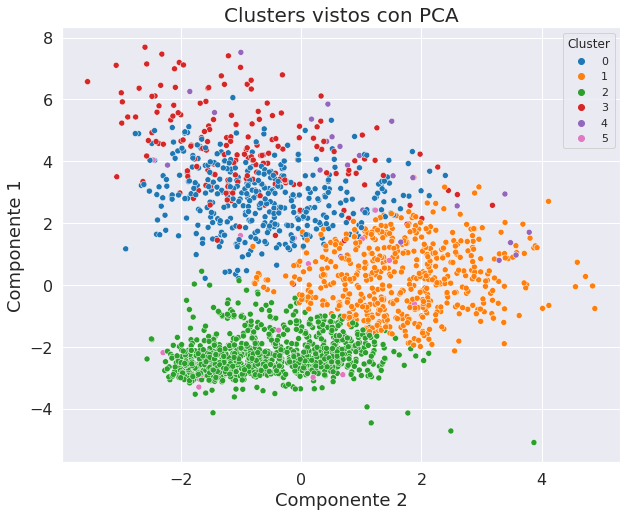

In [334]:
# Creando visualizacion de los datos con PCA

x = df_seg_pca_kmeans['Component 2']
y = df_seg_pca_kmeans['Component 1']
fig = plt.figure(figsize=(10, 8))
sns.scatterplot(x, y, hue=df_seg_pca_kmeans['Cluster'], palette = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:pink'])
plt.title('Clusters vistos con PCA', fontsize=20)
plt.xlabel("Componente 2", fontsize=18)
plt.ylabel("Componente 1", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show();

Prueba del PCA Kmeans con la Columna de Compra Total

In [335]:
data2['Total_spend'] = data2['MntWines']+data2['MntFruits']+data2['MntMeatProducts']+data2['MntFishProducts']+data2['MntSweetProducts']+data2['MntGoldProds']
# se crea una columna que represente el total de compras.

In [336]:
data2['Total_Sons'] = data2['Kidhome']+data2['Teenhome']

In [337]:
data2.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_spend,Total_Sons
0,5524,1957,2,4,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,57,1617,0
1,2174,1954,2,4,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,60,27,2
2,4141,1965,2,5,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,49,776,0


In [338]:
data3 = data2.iloc[:,[2,3,4,31,8,15,16,17,18,19,25,28,29,30]]

In [339]:
data3.head(3)

,Education,Marital_Status,Income,Total_Sons,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Total_spend
0,2,4,58138.0,0,58,3,8,10,4,7,0,1,57,1617
1,2,4,46344.0,2,38,2,1,1,2,5,0,0,60,27
2,2,5,71613.0,0,26,1,8,2,10,4,0,0,49,776


In [340]:
X = data3  # Renombrando variable para utilizarla en Scikit-Learn

In [341]:
# Normalizando dataframe
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [342]:
# Importando PCA
pca = PCA()
pca.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [343]:
evr = pca.explained_variance_ratio_
evr

array([0.28354244, 0.11790765, 0.08929459, 0.08051423, 0.07234054,
       0.07043201, 0.06240103, 0.05387205, 0.04827001, 0.03537724,
       0.02983023, 0.02308819, 0.02174441, 0.01138538])

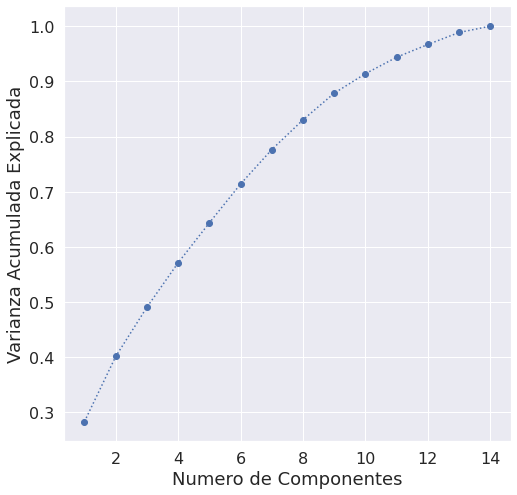

In [344]:
# Ploteando grafico de Componentes principales
fig = plt.figure(figsize=(8,8))
plt.plot(range(1, len(X.columns)+1), evr.cumsum(), marker='o', linestyle=':')
plt.xlabel('Numero de Componentes', fontsize=18)
plt.ylabel('Varianza Acumulada Explicada',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [345]:
# Iteracion para comprobar numero de componentes optimos a utilizar por su nivel de varianza

for i, exp_var in enumerate(evr.cumsum()):
    if exp_var >= 0.8:
        n_comps = i + 1
        break
print("Numero de Componentes Optimos:", n_comps)
pca = PCA(n_components=n_comps)
pca.fit(X_std)
scores_pca = pca.transform(X_std)

Numero de Componentes Optimos: 8


## Algoritmo K-means

In [346]:
# Encontrando el punto del codo de la curva de WCSS (dentro de la suma de cuadrados) usando el KneedLocator
wcss = []
max_clusters = 21
for i in range(1, max_clusters):
    kmeans_pca = KMeans(i, init='k-means++', random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)
n_clusters = KneeLocator([i for i in range(1, max_clusters)], wcss, curve='convex', direction='decreasing').knee
print("Numero de Clusters Optimos:", n_clusters)

Numero de Clusters Optimos: 5


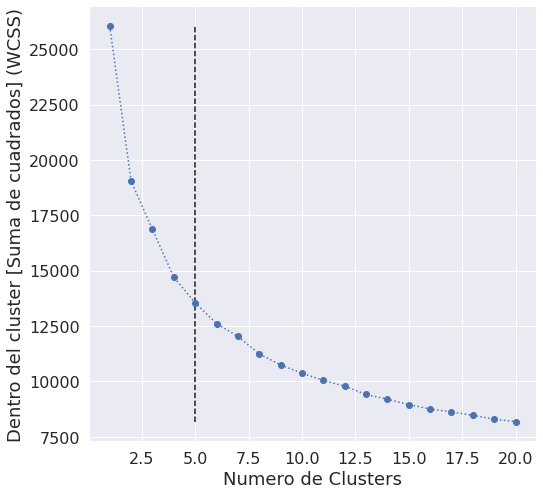

In [347]:
# Ploteando grafico 
fig = plt.figure(figsize=(8,8))
plt.plot(range(1, 21), wcss, marker='o', linestyle=':')
plt.vlines(KneeLocator([i for i in range(1, max_clusters)], wcss, curve='convex', 
                       direction='decreasing').knee, ymin=min(wcss), ymax=max(wcss), linestyles='dashed')
plt.xlabel('Numero de Clusters', fontsize=18)
plt.ylabel('Dentro del cluster [Suma de cuadrados] (WCSS)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [348]:
# Creando la optimizacion de parametros con PCA y K-Means
kmeans_pca = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans_pca.fit(scores_pca);

In [349]:
# Etiquentando cada uno de los datos dentro del cluster respectivo
df_seg_pca_kmeans = pd.concat([pd.DataFrame(X.reset_index(drop=True)), pd.DataFrame(scores_pca)], axis=1)
df_seg_pca_kmeans.columns.values[(-1*n_comps):] = ["Component " + str(i+1) for i in range(n_comps)]
df_seg_pca_kmeans['Cluster'] = kmeans_pca.labels_
df_seg_pca_kmeans.head()

,Education,Marital_Status,Income,Total_Sons,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Total_spend,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,Cluster
0,2,4,58138.0,0,58,3,8,10,4,7,0,1,57,1617,2.583696,0.890732,1.638414,0.061427,0.435659,-0.658152,1.447761,2.238885,3
1,2,4,46344.0,2,38,2,1,1,2,5,0,0,60,27,-1.833736,-0.072092,-0.791676,1.125095,0.311276,0.033515,-1.063658,0.779125,1
2,2,5,71613.0,0,26,1,8,2,10,4,0,0,49,776,1.805878,-0.318886,-0.111158,0.056489,0.300377,-1.218973,-0.975011,-0.466157,0
3,2,5,26646.0,1,26,2,2,0,4,6,0,0,30,53,-1.897032,-0.947988,0.520475,-0.042986,0.038912,-1.292907,-0.330060,-0.990548,1
4,4,3,58293.0,1,94,5,5,3,6,5,0,0,33,422,-0.021628,1.008417,-0.744663,-0.615043,-0.967491,0.804748,1.557175,-1.087555,2


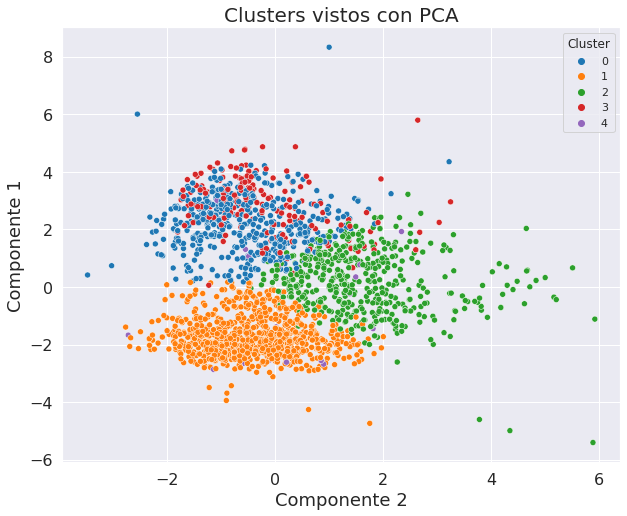

In [350]:
# Creando visualizacion de los datos con PCA

x = df_seg_pca_kmeans['Component 2']
y = df_seg_pca_kmeans['Component 1']
fig = plt.figure(figsize=(10, 8))
sns.scatterplot(x, y, hue=df_seg_pca_kmeans['Cluster'], palette = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple'])
plt.title('Clusters vistos con PCA', fontsize=20)
plt.xlabel("Componente 2", fontsize=18)
plt.ylabel("Componente 1", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show();

Se observa que el componente2 se presenta el cluster 1 desde -2 a 1.8,   y en el componenete 1 el Cluster 1, desde -2 a 0.

El cluster 2, en lo que respecta al componente 2 desde 0 a llegar cercananmente a 4,  y en lo que respecta al compente1 desde -2 a 2.

Los Clusters 3 y 4 se observan de forma sobrepuestas o mezclada.

## Revision de Outliers- Valores Atipicos

In [351]:
data2.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_spend', 'Total_Sons'],
      dtype='object')

In [429]:
data3 = data2.iloc[:,[2,3,4,5,6,8,15,16,17,18,19,20,21,22,23,24,25,28,29,30,31]]   # se procede a realizar una seleccion de caracteristicas

In [430]:
data3.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Total_spend',
       'Total_Sons'],
      dtype='object')

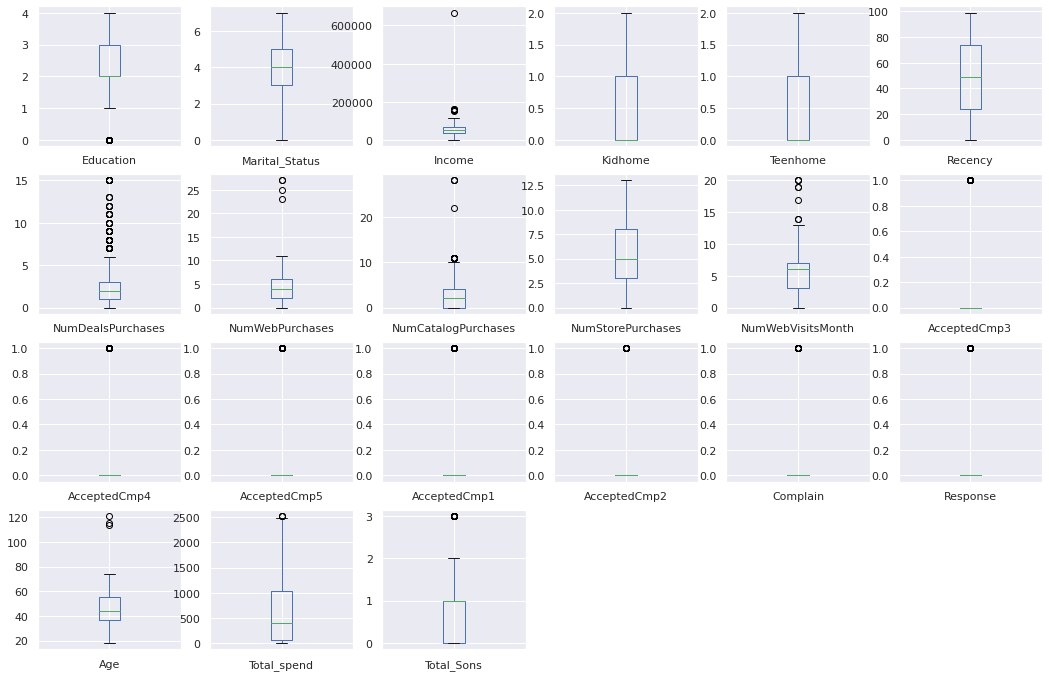

In [431]:
data3.plot(kind='box',subplots=True, layout=(6,6), sharex=False, sharey=False)
sns.set(rc={'figure.figsize':(18,18)})
plt.show()    # Representación de las caracteristicas como vienen en el daset original, sin tratamiento de los outliers - atipicos

Caracteristica Income

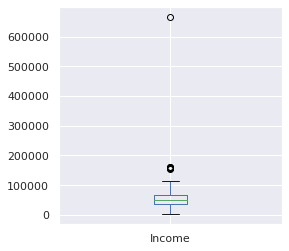

In [433]:
data3['Income'].plot(kind='box')
sns.set(rc={'figure.figsize':(4,4)})
plt.show()

In [434]:
quantiles1 = np.percentile(data3['Income'], [25,50,75])
quantiles1

array([35538.75, 51381.5 , 68289.75])

In [435]:
# Analizando desde el punto de dispersion de los datos 
median1 = quantiles1[1]
IQR1 = quantiles1[2]-quantiles1[0]
sigma1 = 0.75*IQR1

In [436]:
data3 = data3.query("(Income > @median1 - 4*@sigma1) & (Income < @median1 + 4*@sigma1)")

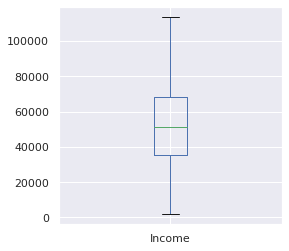

In [437]:
data3['Income'].plot(kind='box')
sns.set(rc={'figure.figsize':(4,4)})
plt.show()

In [438]:
data3.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Total_spend',
       'Total_Sons'],
      dtype='object')

In [439]:
data3.head(3)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_spend,Total_Sons
0,2,4,58138.0,0,0,58,3,8,10,4,7,0,0,0,0,0,0,1,57,1617,0
1,2,4,46344.0,1,1,38,2,1,1,2,5,0,0,0,0,0,0,0,60,27,2
2,2,5,71613.0,0,0,26,1,8,2,10,4,0,0,0,0,0,0,0,49,776,0


In [440]:
data4 = data3.iloc[:,[0,1,2,20,6,7,8,9,10,16,17,18]]

In [441]:
data4.head(3)

,Education,Marital_Status,Income,Total_Sons,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age
0,2,4,58138.0,0,3,8,10,4,7,0,1,57
1,2,4,46344.0,2,2,1,1,2,5,0,0,60
2,2,5,71613.0,0,1,8,2,10,4,0,0,49


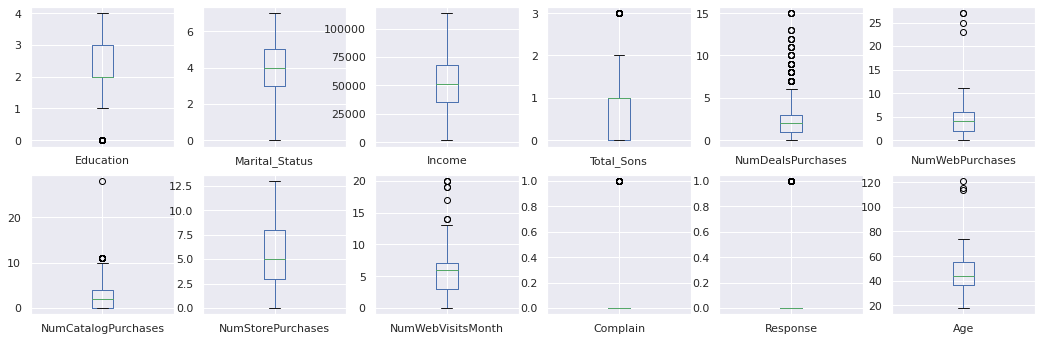

In [443]:
data4.plot(kind='box',subplots=True, layout=(6,6), sharex=False, sharey=False)
sns.set(rc={'figure.figsize':(18,18)})
plt.show()  

##Prueba de Clusters despues de Limpiar Outliers

In [444]:
data4.head(3)

,Education,Marital_Status,Income,Total_Sons,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age
0,2,4,58138.0,0,3,8,10,4,7,0,1,57
1,2,4,46344.0,2,2,1,1,2,5,0,0,60
2,2,5,71613.0,0,1,8,2,10,4,0,0,49


In [445]:
X = data4  # Renombrando variable para utilizarla en Scikit-Learn

In [446]:
# Normalizando dataframe
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [447]:
# Importando PCA
pca = PCA()
pca.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [448]:
evr = pca.explained_variance_ratio_
evr

array([0.2868485 , 0.13852953, 0.09579883, 0.08901062, 0.08359502,
       0.08211277, 0.06410803, 0.05230884, 0.03762678, 0.03161737,
       0.02395371, 0.01448999])

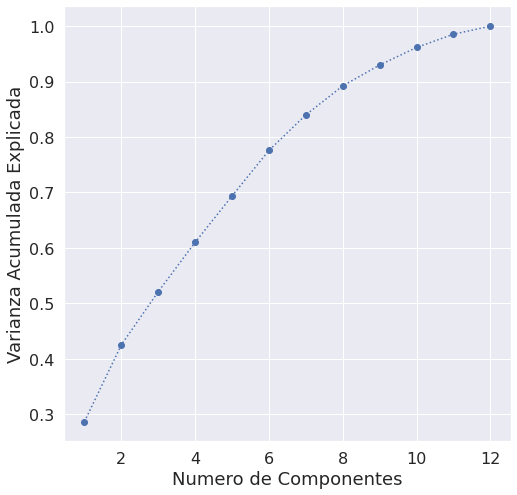

In [449]:
# Ploteando grafico de Componentes principales
fig = plt.figure(figsize=(8,8))
plt.plot(range(1, len(X.columns)+1), evr.cumsum(), marker='o', linestyle=':')
plt.xlabel('Numero de Componentes', fontsize=18)
plt.ylabel('Varianza Acumulada Explicada',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [450]:
# Iteracion para comprobar numero de componentes optimos a utilizar por su nivel de varianza

for i, exp_var in enumerate(evr.cumsum()):
    if exp_var >= 0.8:
        n_comps = i + 1
        break
print("Numero de Componentes Optimos:", n_comps)
pca = PCA(n_components=n_comps)
pca.fit(X_std)
scores_pca = pca.transform(X_std)

Numero de Componentes Optimos: 7


##Algoritmo K-means

In [451]:
# Encontrando el punto del codo de la curva de WCSS (dentro de la suma de cuadrados) usando el KneedLocator
wcss = []
max_clusters = 21
for i in range(1, max_clusters):
    kmeans_pca = KMeans(i, init='k-means++', random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)
n_clusters = KneeLocator([i for i in range(1, max_clusters)], wcss, curve='convex', direction='decreasing').knee
print("Numero de Clusters Optimos:", n_clusters)

Numero de Clusters Optimos: 6


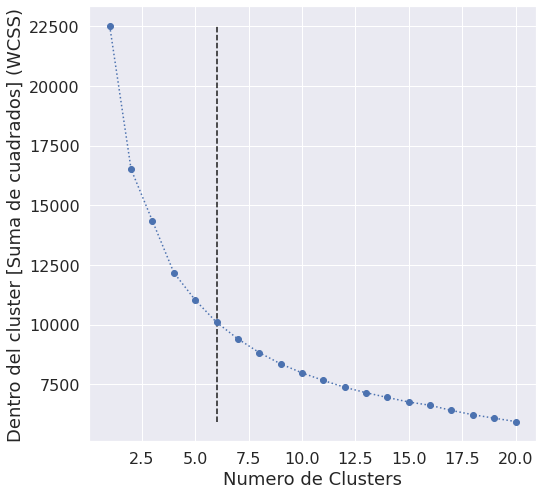

In [452]:
# Ploteando grafico 
fig = plt.figure(figsize=(8,8))
plt.plot(range(1, 21), wcss, marker='o', linestyle=':')
plt.vlines(KneeLocator([i for i in range(1, max_clusters)], wcss, curve='convex', 
                       direction='decreasing').knee, ymin=min(wcss), ymax=max(wcss), linestyles='dashed')
plt.xlabel('Numero de Clusters', fontsize=18)
plt.ylabel('Dentro del cluster [Suma de cuadrados] (WCSS)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [453]:
# Creando la optimizacion de parametros con PCA y K-Means
kmeans_pca = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans_pca.fit(scores_pca);

In [454]:
# Etiquentando cada uno de los datos dentro del cluster respectivo
df_seg_pca_kmeans = pd.concat([pd.DataFrame(X.reset_index(drop=True)), pd.DataFrame(scores_pca)], axis=1)
df_seg_pca_kmeans.columns.values[(-1*n_comps):] = ["Component " + str(i+1) for i in range(n_comps)]
df_seg_pca_kmeans['Cluster'] = kmeans_pca.labels_
df_seg_pca_kmeans.head()

,Education,Marital_Status,Income,Total_Sons,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Cluster
0,2,4,58138.0,0,3,8,10,4,7,0,1,57,-2.018084,0.835268,-1.426728,-1.527709,1.174909,-0.975453,1.709716,4
1,2,4,46344.0,2,2,1,1,2,5,0,0,60,1.513228,-0.064234,1.550883,0.162400,0.037318,0.136527,1.171885,0
2,2,5,71613.0,0,1,8,2,10,4,0,0,49,-1.992577,-0.246301,0.332818,0.716590,-0.256736,-1.151476,-0.273895,1
3,2,5,26646.0,1,2,2,0,4,6,0,0,30,1.785948,-1.011007,-0.121951,0.178987,-0.238456,-1.241855,-0.789635,5
4,4,3,58293.0,1,5,5,3,6,5,0,0,33,-0.146124,1.075636,-0.412046,-0.332825,-0.514251,0.766614,-1.574389,2


##Creando visualizacion de los datos con PCA

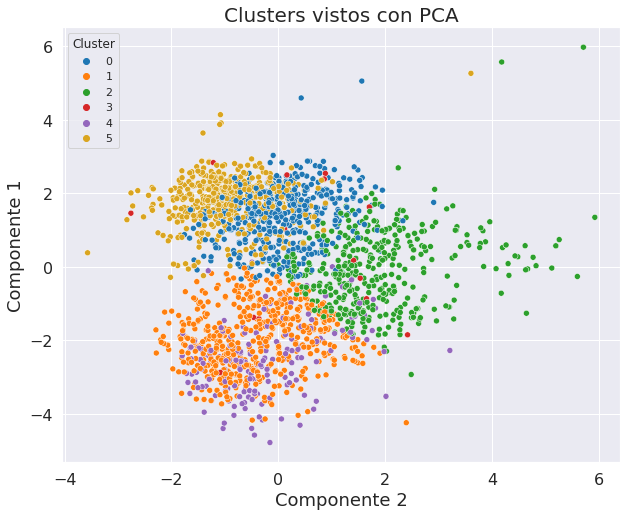

In [455]:
# Creando visualizacion de los datos con PCA

x = df_seg_pca_kmeans['Component 2']
y = df_seg_pca_kmeans['Component 1']
fig = plt.figure(figsize=(10, 8))
sns.scatterplot(x, y, hue=df_seg_pca_kmeans['Cluster'], palette = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'goldenrod'])
plt.title('Clusters vistos con PCA', fontsize=20)
plt.xlabel("Componente 2", fontsize=18)
plt.ylabel("Componente 1", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show();

In [456]:
# los componentes 1 y 2
# el cluster 0 se encentra en medio del cluster 1 y 2 , y el cluster0 se encuentra en el componente2 entre -1 a 1.8, y en el componente1 entre 0 a 3
# el Cluster 1 se encuentra en el componente2 desde -2 a 1.5, y en el componente1 desde -3 a 0 .
# el cluster 2 se encuentra en el componente2 desde 0 a 3 (alrededor) de forma dispersa
# el cluster 3 no se observa
# el cluster 4 se encuentra disperso entre el cluster 1
# el cluster 5 se encuentra en el componente 2 entre -2 a 0, y en el componente1 desde 1 a 3.

In [457]:
# Marcando cada uno de los datos con su respectivo cluster en el dataset original

data1['Cluster'] = df_seg_pca_kmeans['Cluster']
data1

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,age_range,Year,Total_spend,Total_Sons,Cluster
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,57,55,2012,1617,0,4.0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,60,60,2014,27,2,0.0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,49,45,2013,776,0,1.0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,30,30,2014,53,1,5.0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,33,30,2014,422,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,47,45,2013,1341,1,NaN
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,68,65,2014,444,3,NaN
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,33,30,2014,1241,0,NaN
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,58,55,2014,843,1,NaN


In [458]:
# Comprobando cantidad de datos en cada Cluster

pd.value_counts(data1['Cluster'])

1.0    569
5.0    523
0.0    500
2.0    424
4.0    195
3.0     21
Name: Cluster, dtype: int64

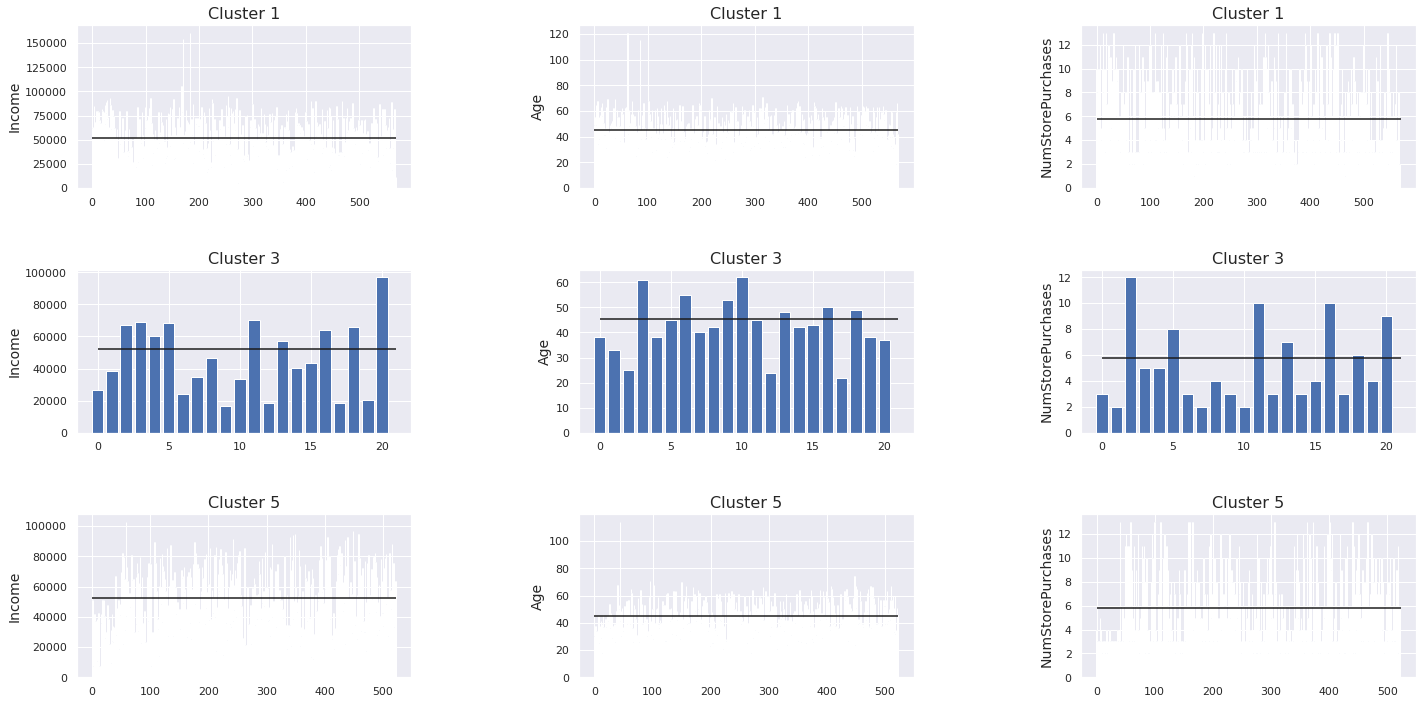

In [459]:
# Visualizando caracteristicas generales de cada cluster

clusters = [1, 3, 5]
features = ["Income", "Age", "NumStorePurchases"]
#colors = ['tab:green', 'tab:olive', 'tab:cyan']
dim = len(clusters)

fig, axes = plt.subplots(dim, dim, figsize=(24, 12))
i = 0
test_cluster = data1.loc[data1['Cluster'] == clusters[0]]
for ax in (axes.flatten()):
    if i % dim == 0 and i != 0:
        test_cluster = data1.loc[data1['Cluster'] == clusters[i // dim]]
    col = features[i % dim]
    y = test_cluster[col]
    x = [i for i in range(len(y))]
    ax.bar(x, y) #colors[i//dim]
    ax.set_ylabel(col, fontsize=14)
    ax.set_title("Cluster " + str(clusters[i // dim]), fontsize=16)
    ax.hlines(np.mean(data1[col]), 0, len(y))
    plt.subplots_adjust(wspace=.5, hspace=.5)
    i += 1

In [ ]:
# se obser el el cuadro anterior que en el Cluster 3 parece estar uno de los grupos de mayor nivel de ingreso, en comparación con cluster 5 y Cluster1
# se puede ver que el cluster 3 indica tener el grupo de clientes de mayor edad en comparación a los cluster 5 y cluster 1
# em lo que rspecta al numero de compras en las tiendas (NumStorePurchases) se observan en comportamiento similar en los cluesters.

In [460]:
# Visualizando datos de cada Cluster a nivel de filtrado

preview = data1.loc[data1['Cluster'] == 5]
print(len(preview))
preview.head(n=30)

# se observa la distribucion de las caracteristicas según el cluster5, en donde se pueden ver los valores que poseen cada una según se integran al cluster.
# el cluster5 presenta la información del comportamiento de compra de aquellos que el algoritmo los identifica como tales.

523


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,age_range,Year,Total_spend,Total_Sons,Cluster
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,30,30,2014,53,1,5.0
10,1994,1983,Graduation,Married,51381.5,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0,31,30,2013,19,1,5.0
11,387,1976,Basic,Married,7500.0,0,0,2012-11-13,59,6,16,11,11,1,16,1,2,0,3,8,0,0,0,0,0,0,3,11,0,38,35,2012,61,0,5.0
14,2569,1987,Graduation,Married,17323.0,0,0,2012-10-10,38,3,14,17,6,1,5,1,1,0,3,8,0,0,0,0,0,0,3,11,0,27,25,2012,46,0,5.0
16,9736,1980,Graduation,Married,41850.0,1,1,2012-12-24,51,53,5,19,2,13,4,3,3,0,3,8,0,0,0,0,0,0,3,11,0,34,30,2012,96,2,5.0
19,2278,1985,2n Cycle,Single,33812.0,1,0,2012-03-11,86,4,17,19,30,24,39,2,2,1,3,6,0,0,0,0,0,0,3,11,0,29,25,2012,133,1,5.0
20,9360,1982,Graduation,Married,37040.0,0,0,2012-08-08,41,86,2,73,69,38,48,1,4,2,5,8,0,0,0,0,0,0,3,11,0,32,30,2012,316,0,5.0
25,7892,1969,Graduation,Single,18589.0,0,0,2013-02-01,89,6,4,25,15,12,13,2,2,1,3,7,0,0,0,0,0,0,3,11,0,45,45,2013,75,0,5.0
28,9422,1989,Graduation,Married,38360.0,1,0,2013-05-31,26,36,2,42,20,21,10,2,2,1,4,3,0,0,0,0,0,0,3,11,0,25,25,2013,131,1,5.0
30,6864,1989,Master,Divorced,10979.0,0,0,2014-05-22,34,8,4,10,2,2,4,2,3,0,3,5,0,0,0,0,0,0,3,11,0,25,25,2014,30,0,5.0


In [461]:
round(df_seg_pca_kmeans.pivot_table('Age', index= 'Cluster', aggfunc= 'mean',fill_value=0),2)

,Age
Cluster,
0,49.93
1,47.44
2,47.88
3,48.90
4,45.19
5,35.96


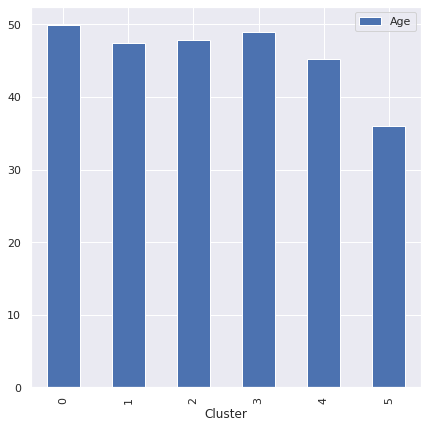

In [463]:
round(df_seg_pca_kmeans.pivot_table('Age', index= 'Cluster', aggfunc= 'mean',fill_value=0),2).plot(kind = 'bar')
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [380]:
# Del gráfico anterior se puede ver que las edades entre los primeros 4 cluster son muy similares, mientras que los ultimos dos 
# cluster tienen a los clientes más jovenes

In [464]:
round(df_seg_pca_kmeans.pivot_table('Income', index= 'Cluster', aggfunc= 'mean',fill_value=0),2)

,Income
Cluster,
0,39826.32
1,70963.72
2,55645.15
3,45242.29
4,75879.98
5,29844.13


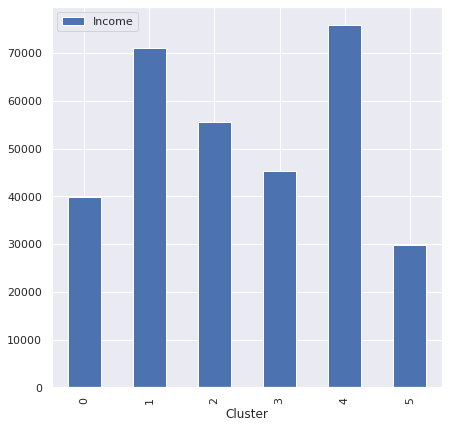

In [465]:
round(df_seg_pca_kmeans.pivot_table('Income', index= 'Cluster', aggfunc= 'mean',fill_value=0),2).plot(kind = 'bar')
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [383]:
# según se puede ver el cluster 1 y 4 poseen los clientes de mayor ingreso

## Prueba Modelo Supervisado

Se realiza una prueba para determinar si algunas variables que se utilien pueden predecir si un cliente puede o no reacccionar positivamente a las campañas.

In [466]:
data3.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Total_spend',
       'Total_Sons'],
      dtype='object')

In [467]:
data3.head(3)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_spend,Total_Sons
0,2,4,58138.0,0,0,58,3,8,10,4,7,0,0,0,0,0,0,1,57,1617,0
1,2,4,46344.0,1,1,38,2,1,1,2,5,0,0,0,0,0,0,0,60,27,2
2,2,5,71613.0,0,0,26,1,8,2,10,4,0,0,0,0,0,0,0,49,776,0


In [468]:
data5 = data3.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,16,17,18]]

In [469]:
data5.head(3)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,Complain,Response,Age
0,2,4,58138.0,0,0,58,3,8,10,4,7,0,0,1,57
1,2,4,46344.0,1,1,38,2,1,1,2,5,0,0,0,60
2,2,5,71613.0,0,0,26,1,8,2,10,4,0,0,0,49


In [470]:
data5.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'Complain', 'Response', 'Age'],
      dtype='object')

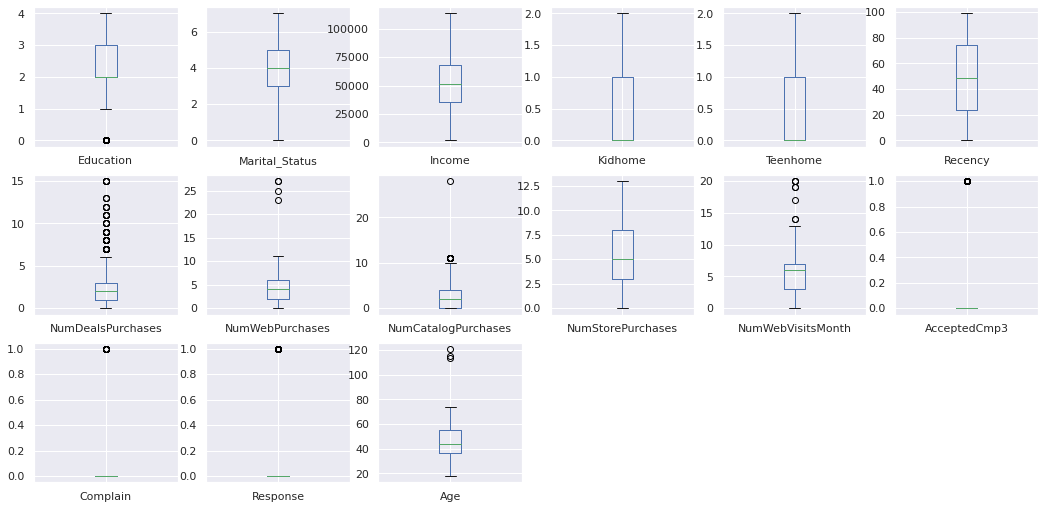

In [472]:
data5.plot(kind='box',subplots=True, layout=(6,6), sharex=False, sharey=False)
sns.set(rc={'figure.figsize':(18,18)})
plt.show() 

In [473]:
data5.iloc[:,[0,1,2,3,4,5,11,12,13,14]]

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,AcceptedCmp3,Complain,Response,Age
0,2,4,58138.0,0,0,58,0,0,1,57
1,2,4,46344.0,1,1,38,0,0,0,60
2,2,5,71613.0,0,0,26,0,0,0,49
3,2,5,26646.0,1,0,26,0,0,0,30
4,4,3,58293.0,1,0,94,0,0,0,33
...,...,...,...,...,...,...,...,...,...,...
2235,2,3,61223.0,0,1,46,0,0,0,47
2236,4,5,64014.0,2,1,56,0,0,0,68
2237,2,2,56981.0,0,0,91,0,0,0,33
2238,3,5,69245.0,0,1,8,0,0,0,58


In [474]:
# Importando bibliotecas
from pandas import read_csv 
import pandas as pd #manejo y estructuracion de datos y su manipulación
from pandas.plotting import scatter_matrix #diagramas de correlacción
from matplotlib import pyplot #Hacer gráficos en python
from sklearn.model_selection import train_test_split #lograr dividir las muestras
from sklearn.model_selection import cross_val_score #validación cruzada score 
from sklearn.model_selection import StratifiedKFold #validacion cruzada 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix #matriz de confusión
from sklearn.metrics import accuracy_score #score de validación cruzada 

In [475]:
# Modelos de ML con que se va a trabajar
from sklearn.metrics import accuracy_score #score de validación cruzada 
from sklearn.linear_model import LogisticRegression #regresion logística
from sklearn.tree import DecisionTreeClassifier #arboles de decision
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis #Análisis discriminante lineal 
from sklearn.naive_bayes import GaussianNB #Gauss Bayesiana
from sklearn.svm import SVC # Maquinas de Soporte Vectorial
from sklearn.model_selection import train_test_split

In [476]:
# Conjunto de datos de validación dividida
# Con el 80% se crea el modelo y con el 20% se entrena

array = data5.values #los datos ahora se transforman en un arreglo

X = array[:,[0,1,2,3,4,5,11,12,14]]  # se toman los datos, sin la clase de clasificación
y = array[:,13] # se toman los datos 

# Se dividen los datos en conjunto de entrenamiento y prueba, se utiliza random_state = 0 para que no dé
# resultados diferentes si se vuelve a correr. 
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=0) 

In [477]:
# Algoritmos de Comprobación, se guardan en una lista
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC()))

In [478]:
#Se debe seleccionar el mejor modelo, ya que ahora se tienen 6 modelos y estimaciones de precisión para cada uno,
#por ello se necesita comparar los modelos entre sí y seleccionar el más preciso.
import warnings
warnings.filterwarnings('ignore')

resultados = []
names = []


# Si se necesita tanto el índice o nombre, así como el elemento, se usa for indice, elemento en lista
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True) # Declaracion de la validación cruzada, las características
    cv_resultados = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy') # genera la precisión de la validación cruzada y la guarda en la variable cv_resultados en lista
    resultados.append(cv_resultados)  # genera la precisión de la validación cruzada y la guarda en la variable cv_resultados en matrices, esto para hacer el boxplot.
    names.append(name) # names en matrices
    print('%s: %f (%f)' % (name, cv_resultados.mean(), cv_resultados.std()))

LR: 0.845377 (0.005149)
LDA: 0.853198 (0.021976)
KNN: 0.825755 (0.019314)
CART: 0.797728 (0.030312)
NB: 0.845936 (0.007645)
SVC: 0.842019 (0.002051)


In [479]:
# Haciendo predicciones y evaluación del dataset

model = LinearDiscriminantAnalysis()
model.fit(X_train, Y_train)
prediccion = model.predict(X_test)

In [480]:
mc =pd.DataFrame(confusion_matrix(Y_test, prediccion, labels=[0,1]), 
                 index = [0,1],  
                 columns = [0,1])  
 
# Evaluando Predicciones
print("ROC:", accuracy_score(Y_test, prediccion),sep='\n')
print("")
print("Matriz de Confusión:", mc,sep='\n')

ROC:
0.8769574944071589

Matriz de Confusión:
     0   1
0  380  15
1   40  12


In [481]:
# la matriz de confusion indica parte de la efectividad del algoritmo de identificación para lo que se le configura
# en este caso el algoritmo identificó 380 positivos verdaderos e identifió 12 negativos verdaderos.

In [482]:
from sklearn.preprocessing import LabelEncoder

In [483]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=10)
classifier.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=10, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [484]:
y_pred = classifier.predict(X_test)

In [485]:
reaccion_positiva =  classifier.predict([[2,5,89000,2,2,12,1,1,42]])  # predicción de reacción o no a la campaña apublicitaria
print(reaccion_positiva)   

[0.]


In [486]:
reaccion_positiva =  classifier.predict([[3,4,59000,2,0,38,0,0,45]])     # predicción de reacción o no a la campaña apublicitaria
print(reaccion_positiva)

[0.]


In [487]:
reaccion_positiva =  classifier.predict([[4,4,100000,2,8,44,1,0,28]])     # predicción de reacción o no a la campaña apublicitaria
print(reaccion_positiva)

[0.]


In [488]:
reaccion_positiva =  classifier.predict([[3,2,75000,2,1,8,1,1,28]])     # predicción de reacción o no a la campaña apublicitaria
print(reaccion_positiva)                                                # el modelo supervisado permite determinar si un cliente según algunas caracteristicas,
                                                                        #  va o no a reaccionar a la camapaña

[1.]


In [489]:
data5.iloc[:,[0,1,2,3,4,5,11,12,13,14]]

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,AcceptedCmp3,Complain,Response,Age
0,2,4,58138.0,0,0,58,0,0,1,57
1,2,4,46344.0,1,1,38,0,0,0,60
2,2,5,71613.0,0,0,26,0,0,0,49
3,2,5,26646.0,1,0,26,0,0,0,30
4,4,3,58293.0,1,0,94,0,0,0,33
...,...,...,...,...,...,...,...,...,...,...
2235,2,3,61223.0,0,1,46,0,0,0,47
2236,4,5,64014.0,2,1,56,0,0,0,68
2237,2,2,56981.0,0,0,91,0,0,0,33
2238,3,5,69245.0,0,1,8,0,0,0,58


##Conclusiones

###Cómo son los Clientes?

En términos de Edad, Ingreso, Estado Civil, Nucleo Familiar Comportamiento de Compra

Entre menor se los días de la ultima compra, mejor respuesta tendrá el cliente a la campaña.

Existe relación entre comprar un producto junto con otro, además aquellos que tienen una mayor cantidad de hijos tienden a realizar compras con descuentos.

La cantidad promedio de hijos por hogar corresponde alrededor de un hijo, la edad promedio de los clientes es de 45 años, la edad que más se repite más veces en los clientes es 38.

El ingreso promedio de los clientes es de $52 237

El monto promedio que los clientes gastan en las compras totales es de $ 605.79

Los clientes prefieren en su mayoría realizar las compras en las tiendas o establecimientos físicos, seguido de las compras por la web.

Aquellos que van más a las tiendas corresponde a los que se encuentran casados o en una relación.

Según se observó en nivel de compras totales con el pasar de los años va en descenso.

Por medio de la aplicación de un método supervisado, se puede determinar si un cliente puede o no reaccionar positivamente a las campañas.

Además la creación de Cluster de los clientes, nos permite determinar por rangos de edad o niveles de ingreso algún tipo de conducta de compra, que permita formular una campaña publicitaria por el medio de compra preferido del cliente (tiendas y Web)

## Recomendaciones

Se pueden realizar campañas de descuentos para aquellos clientes de familias numerosas, promoviendo las compras.

Además aquellos clientes nuevos se les puede invitar a visitar la pagina web , redes sociales y uso de alguna app para promover la visita y fidelización del cliente.

Tomar información de los clientes adicionales como el género, lo cual permitiría segmentar aun mejor una camapaña dirigida a los gustos y preferencias del consumidor.

Aquellos clientes que tienen que ir a la tienda por un producto de su preferencia, podría estimularse la compra de un producto adicional si se le ofrece una regalía o combo.  Esto por la correlación que existe entre los prodctos evaluados.

### Resumen de las Caracteristicas 

Las variables o dataset utilizados



1.   data  es el datset original tal y como se recibe y se le limpia los nulos
2.   data1  es el dataset copia del datset original, utilizado para el proceso de EDA y transformaciones que enrriquecen el proceso de análisis
3.  data2 con vamos a proceder a convertir las caracteristicas objeto en numericas 
4.  data3 la que se utlizó para limpiar los outliers y Kmeans inicial, posteriormente se realiza otro proceso de Kmeans con menos columnas
5.  data4 y data5 se utlizan para los procesos de machine learning tienen columnas seleccionadas a criterio para el desarrollo del trabajo



## Caracteristicas

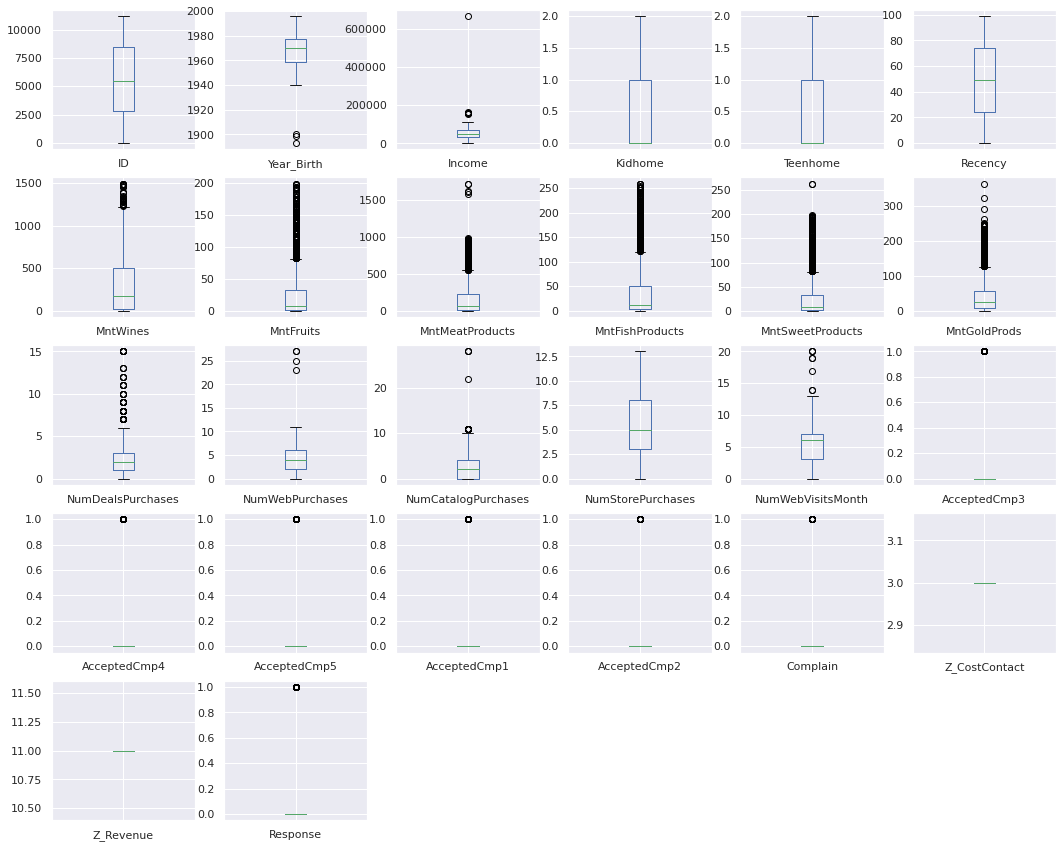

In [407]:
data.plot(kind='box',subplots=True, layout=(6,6), sharex=False, sharey=False)
sns.set(rc={'figure.figsize':(18,18)})
plt.show()    # Representación de las caracteristicas como vienen en el daset original, sin tratamiento de los outliers - atipicos

## Caracteristicas posterior del Trabajo de Caracteristicas y Outliers

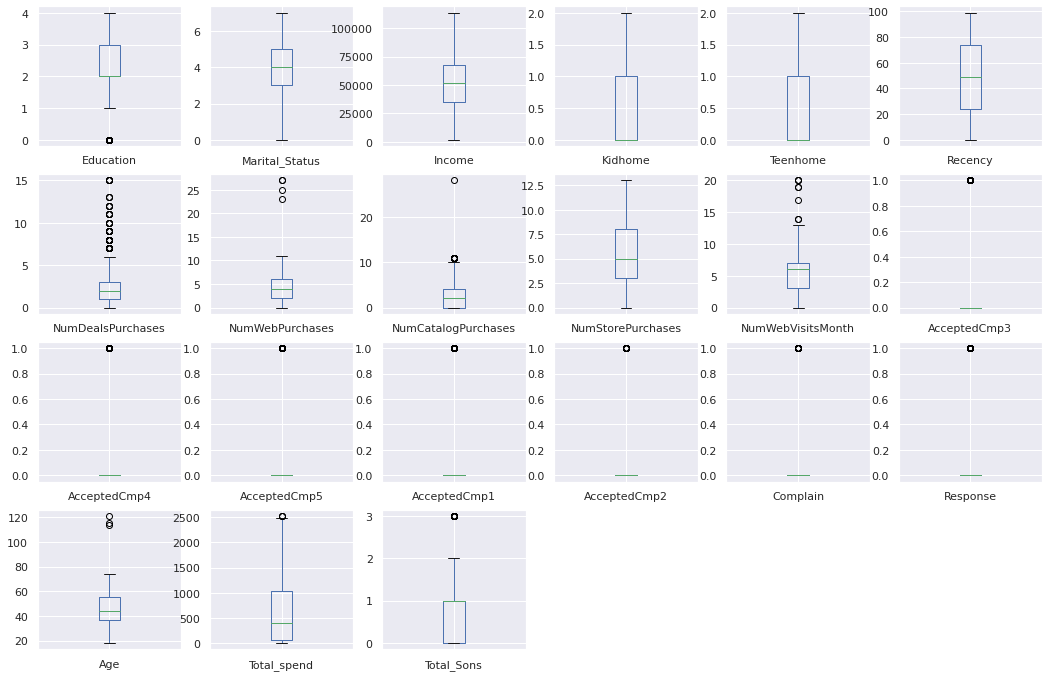

In [408]:
data3.plot(kind='box',subplots=True, layout=(6,6), sharex=False, sharey=False)
sns.set(rc={'figure.figsize':(18,18)})
plt.show()   

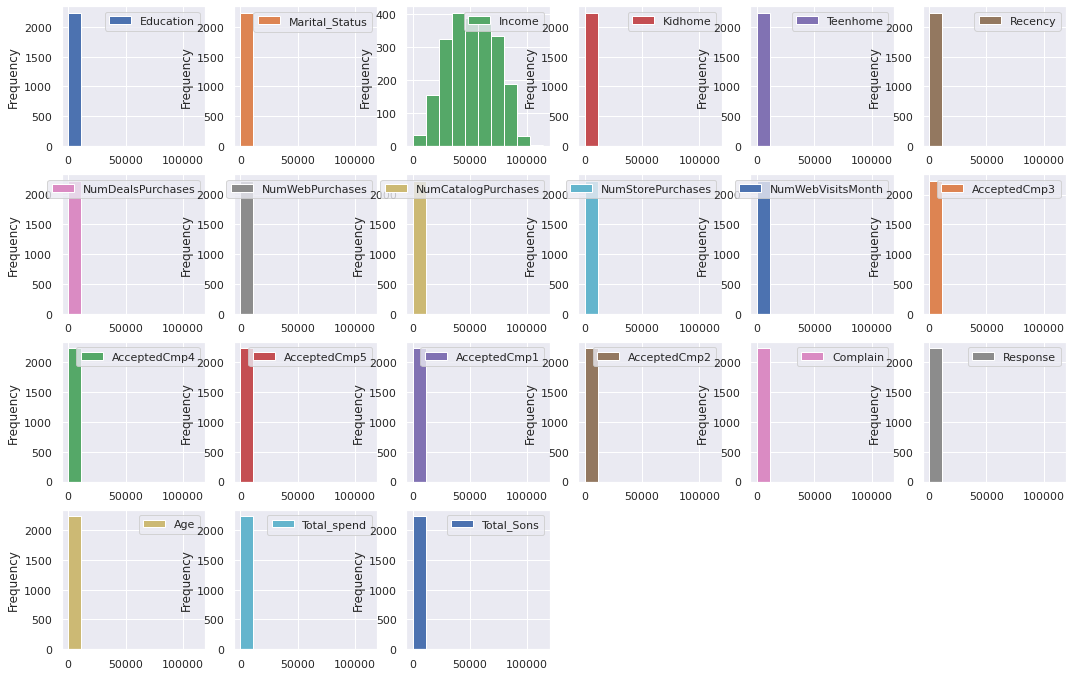

In [409]:
data3.plot(kind='hist',subplots=True, layout=(6,6), sharex=False, sharey=False)
sns.set(rc={'figure.figsize':(18,18)})
plt.show()                              # presentacion de los histogramas de las caracteristicas  

In [410]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2240.0,52237.975446,25037.955891,1730.0,35538.75,51381.5,68289.75,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


**Fuente Primarias**

codigo
1. Como extraer año de fecha y hora

https://www.it-swarm-es.com/es/python/python-pandas-extraer-ano-de-fecha-y-hora-df-ano-df-fecha.-ano-no-funciona/1053538121/

2. Uso de código visto en la web

PETR KOLAR 
https://www.kaggle.com/petrkolar/ml-workflow-0-99-f1

MULTICOLLINEARITY (CORRELATION BETWEEN PREDICTOR VARIABLES)

cor_matrix = df.corr().abs()
cor_matrix.style.background_gradient(sns.light_palette('red', as_cmap=True))

**Fuentes Secundarias**

1. Influencia de la publicidad en el comportamiento de compra de los estudiantes de mercadeo de la Extensión Universitaria de Aguadulce. vol. 5, núm. 1, 2020

http://portal.amelica.org/ameli/jatsRepo/212/2121146005/html/index.html

2. Análisis del efecto de la publicidad en la intención de compra y el papel que en esa relación juegan el brand engagement y el brand equity.2018

https://repository.icesi.edu.co/biblioteca_digital/bitstream/10906/84330/1/TG02186.pdf
